# NOB, FITE, TUT Bond Futures Spreads

Author: Mark Black

Date: 6/8/2017

In this research notebook we explore the 3 different bond future spreads: NOB FITE TUT
Each of the spreads is specific  strategy on trading parts of the yield curve either flattening or steepening.

Below is a breakdown of each spread

    - NOB: 3:1 ratio of TNote 10 yr : TBond 30 yr (TY : US)
    - FITE: 3:2 ratio of TNote 5 yr : TNote 10 yr (FV : TY)
    - TUT: 1:1 ratio of TNote 2 yr : TNote 10 yr (TU : TY)
    
We will start with the NOB Spread

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
import talib
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
from quantopian.research.experimental import continuous_future, history

### NOB Spread

The "NOB" Spread is the difference between the 10 & 30 yr UST that is a binary trade where a trader is betting that the yield curve will flatten or steepen. 

The default proportion is a 3:1 (TY:US)

- If you believe that the yield curve will steepen you buy the back 30 yr UST and sell the front 10 yr UST in a -2:3 ratio.

- If you believe that the yield curve will flatten you buy the front 10 yr UST and sell the  back 30 yr contracts in a 3:-2 ratio.

https://www.tastytrade.com/tt/shows/futures-measures/episodes/nob-spread-notes-over-bonds-spread-06-17-2015

In [15]:
ty_future = continuous_future('TY', offset=0, roll='calendar', adjustment='mul')
ty_prices = history(ty_future, fields='price', start_date='2007-01-01', end_date='2017-05-01')
ty_prices.name = ty_future.root_symbol

zn_future = continuous_future('US', offset=0, roll='calendar', adjustment='mul')
zn_prices = history(zn_future, fields='price', start_date='2007-01-01', end_date='2017-05-01')
zn_prices.name = zn_future.root_symbol

nob = pd.concat([ty_prices, zn_prices], axis=1)
nob = nob.dropna()
nob.head()

TY        US
2007-01-02 00:00:00+00:00  79.496528  91.53382
2007-01-03 00:00:00+00:00  79.623538  91.73866
2007-01-04 00:00:00+00:00  79.923742  92.19952
2007-01-05 00:00:00+00:00  79.715908  91.89228
2007-01-08 00:00:00+00:00  79.692816  91.89228

In [16]:
# NOB column calculation
nob['NOB'] = ty_prices / zn_prices
# NOB RSI 14 column
nob['RSI14'] = talib.RSI(nob.NOB, timeperiod=14)
nob['RSI5'] = talib.RSI(nob.NOB, timeperiod=5)

#rsi_df = pd.DataFrame(rsi).dropna()

Now we employ the eyeball test to see if there a possible trading strategy using RSI 14

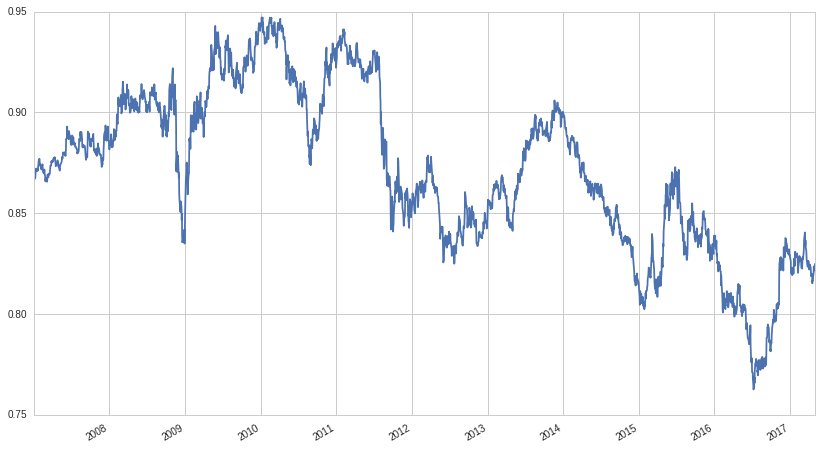

In [17]:
nob['NOB'].plot()
#plt.legend();
#plt.ylabel('NOB Spread')
#data2

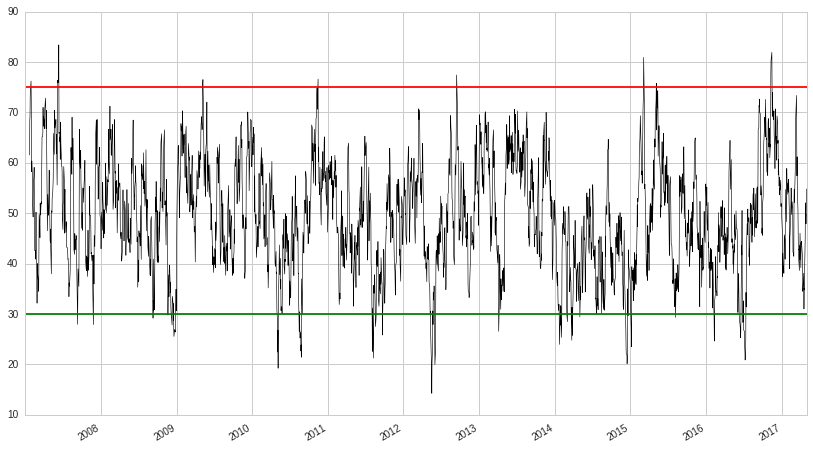

In [18]:
nob['RSI14'].plot(color='black', linewidth=.6)
plt.axhline(y=75, xmin=0, xmax=1, hold=None, color='red')
plt.axhline(y=30, xmin=0, xmax=1, hold=None, color='green')

The eyeball test for RSI 5

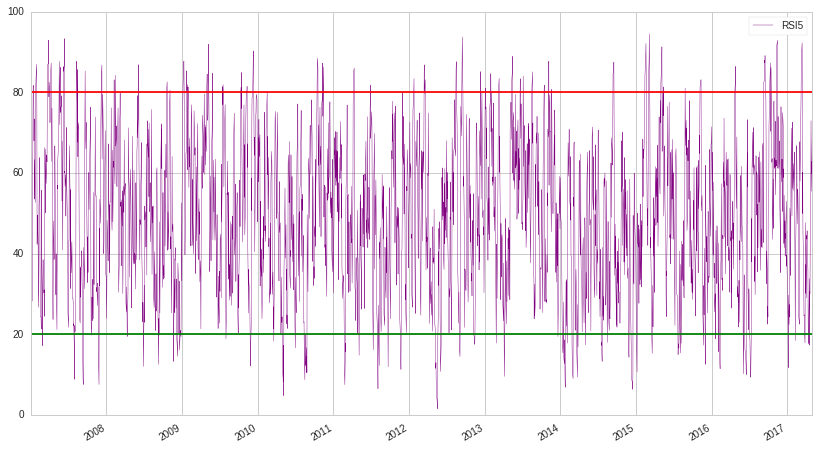

In [19]:
#nob['NOB'].plot()
nob['RSI5'].plot(color='purple', linewidth=.4)
plt.axhline(y=80, xmin=0, xmax=1, hold=None, color='red')
plt.axhline(y=20, xmin=0, xmax=1, hold=None, color='green')
plt.legend();

Now it's time to take the NOB RSI spread to the backtesting algorithm stage. 

In [20]:
# RSI_14 30/75
# with leverage -.4/6 ratio
nob_rsi14_bt = get_backtest('5939e5c9f4c4366a0bf43345')

100% Time: 0:00:01|###########################################################|


In [21]:
# RSI 15/85
# with leverage -.4/6 ratio
nob_rsi5_bt = get_backtest('5939e03d2ca2af6e3dcf335b')

100% Time: 0:00:01|###########################################################|


Entire data start date: 2007-09-03
Entire data end date: 2016-09-30


Out-of-Sample Months: 33
Backtest Months: 77


Performance statistics   All history  Backtest  Out of sample
annual_return                   0.10      0.07           0.16
cum_returns_final               1.37      0.56           0.52
annual_volatility               0.16      0.17           0.13
sharpe_ratio                    0.66      0.49           1.19
calmar_ratio                    0.41      0.30           1.28
stability_of_timeseries         0.90      0.84           0.87
max_drawdown                   -0.24     -0.24          -0.13
omega_ratio                     1.12      1.09           1.22
sortino_ratio                   0.97      0.72           1.77
skew                            0.26      0.32          -0.02
kurtosis                        3.23      3.24           1.10
tail_ratio                      0.99      0.98           1.08
common_sense_ratio              1.09      1.05           1.25
gross_leverage                  0.00      0.00           0.00
information_ratio               0.00      0.00           0.02
alpha                           0.14      0.11           0.19
beta                           -0.34     -0.32          -0.41

Worst drawdown periods net drawdown in %  peak date valley date recovery date  \
0                                  23.87 2008-12-18  2009-06-10    2010-10-06   
1                                  20.44 2012-07-24  2013-09-05    2014-10-15   
2                                  16.99 2010-10-06  2011-02-08    2011-07-29   
3                                  12.84 2008-09-15  2008-10-17    2008-11-19   
4                                  12.53 2015-01-30  2015-06-10    2016-02-02   

Worst drawdown periods duration  
0                           470  
1                           582  
2                           213  
3                            48  
4                           263



[-0.02  -0.039]


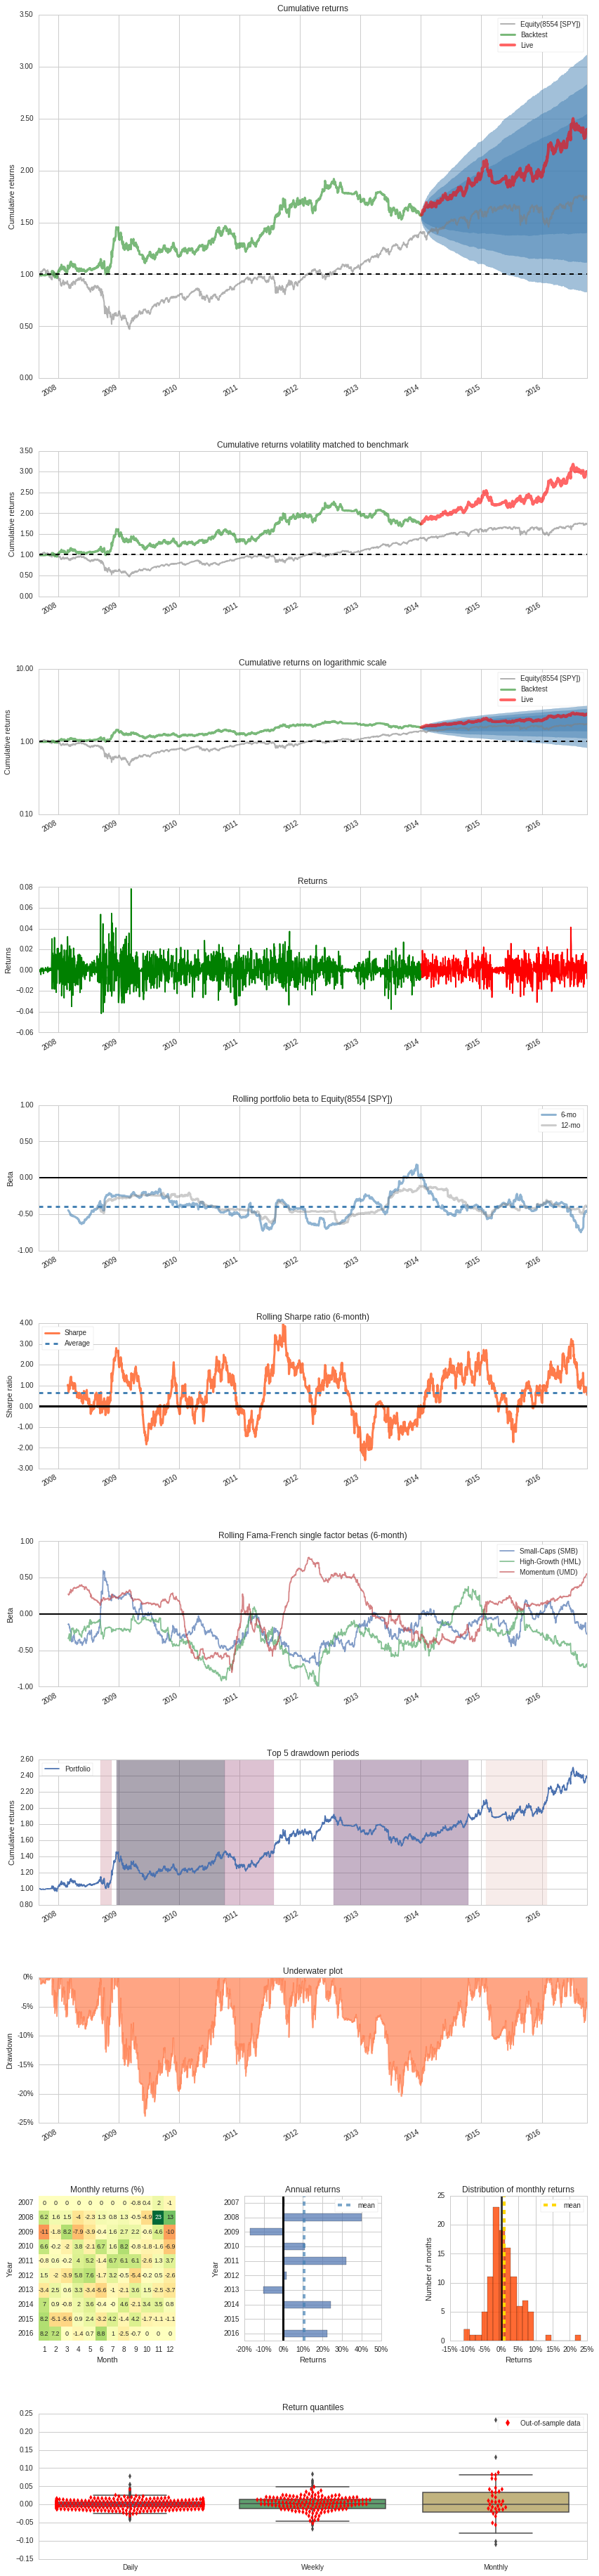

In [22]:
nob_rsi14_bt.create_returns_tear_sheet(live_start_date='2014-1-1')

Entire data start date: 2007-05-07
Entire data end date: 2016-05-10


Out-of-Sample Months: 28
Backtest Months: 81


Performance statistics   All history  Backtest  Out of sample
annual_return                   0.08      0.06           0.13
cum_returns_final               0.98      0.47           0.35
annual_volatility               0.14      0.15           0.13
sharpe_ratio                    0.58      0.45           1.00
calmar_ratio                    0.36      0.27           1.01
stability_of_timeseries         0.81      0.79           0.72
max_drawdown                   -0.21     -0.21          -0.13
omega_ratio                     1.11      1.09           1.18
sortino_ratio                   0.85      0.66           1.44
skew                            0.22      0.34          -0.24
kurtosis                        4.02      4.75           0.55
tail_ratio                      1.00      0.99           1.08
common_sense_ratio              1.08      1.04           1.23
gross_leverage                  0.00      0.00           0.00
information_ratio               0.00     -0.00           0.01
alpha                           0.10      0.08           0.16
beta                           -0.25     -0.24          -0.37

Worst drawdown periods net drawdown in %  peak date valley date recovery date  \
0                                  21.20 2012-01-31  2013-09-05    2014-12-16   
1                                  18.40 2009-04-01  2009-06-10    2010-08-06   
2                                  13.93 2010-10-06  2011-02-08    2011-08-04   
3                                  13.04 2015-01-30  2015-06-10    2016-02-08   
4                                  10.07 2011-09-22  2011-10-27    2011-12-19   

Worst drawdown periods duration  
0                           751  
1                           353  
2                           217  
3                           267  
4                            63



[-0.018 -0.036]


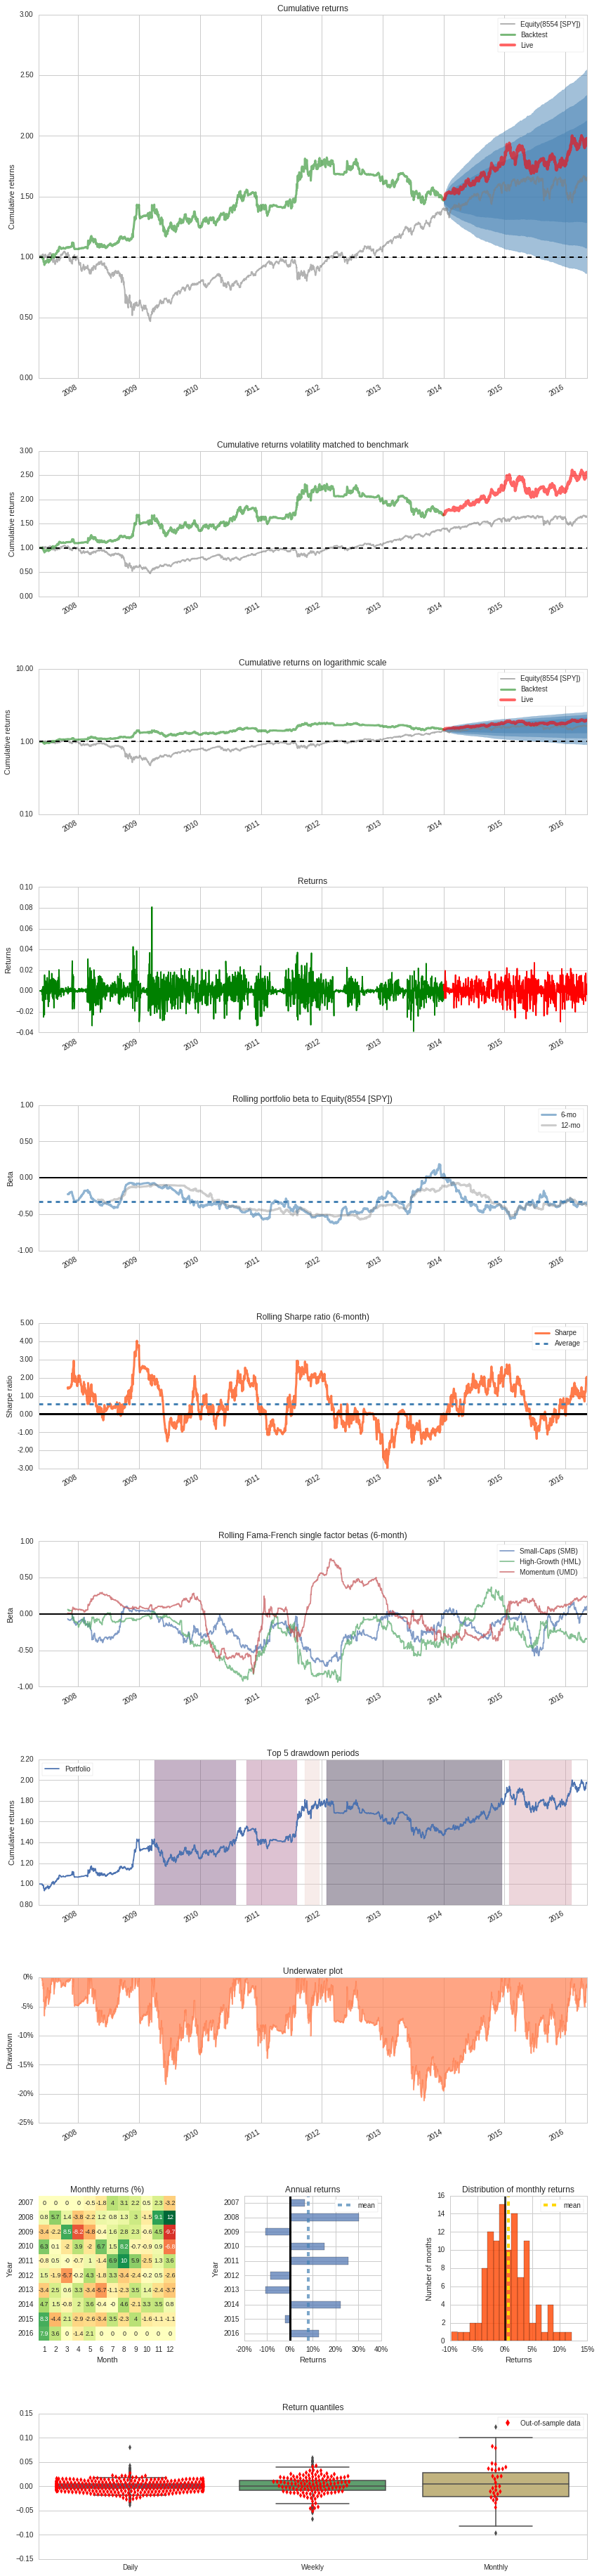

Stress Events                       mean    min   max
Lehmann                            0.11% -1.30% 1.68%
US downgrade/European Debt Crisis  0.41% -2.81% 3.71%
Fukushima                         -0.04% -0.36% 0.26%
EZB IR Event                      -0.07% -0.43% 0.16%
Aug07                              0.14% -1.64% 1.21%
Mar08                             -0.03% -3.35% 2.23%
Sept08                             0.15% -1.30% 1.68%
2009Q1                            -0.13% -2.93% 1.54%
2009Q2                            -0.11% -2.86% 8.08%
Flash Crash                        0.01% -0.42% 0.79%
Apr14                              0.12% -1.34% 1.35%
Oct14                              0.14% -0.97% 1.87%
Fall2015                           0.03% -2.41% 1.82%
Low Volatility Bull Market         0.02% -2.52% 1.92%
GFC Crash                          0.08% -3.35% 8.08%
Recovery                           0.02% -3.37% 3.71%
New Normal                         0.02% -3.90% 2.72%

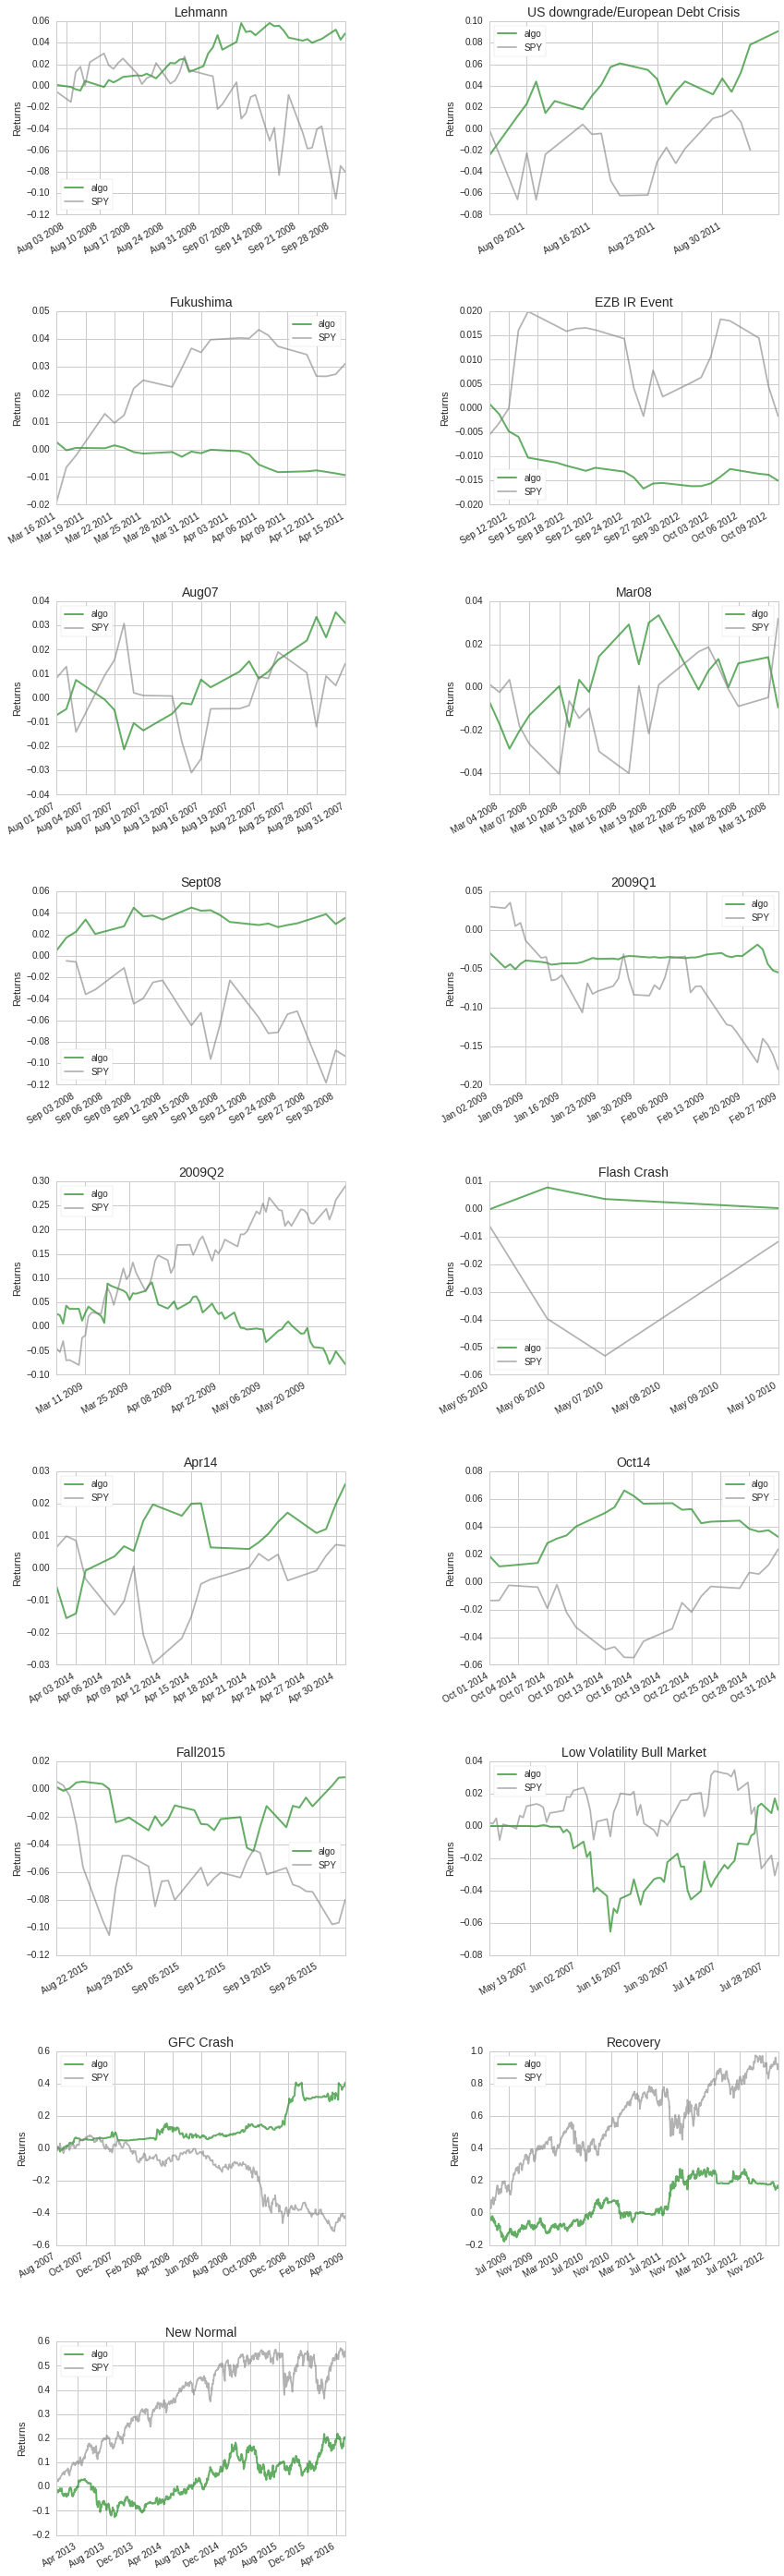

Top 10 long positions of all time   max
TYU13-1020201309                  0.11%
TYH13-1020201303                  0.11%
USU13-1022201309                  0.11%
TYU09-1020200909                  0.11%
TYH11-1020201103                  0.11%
TYH08-1020200803                  0.11%
USH11-1022201103                  0.10%
USM12-1022201206                  0.10%
TYH12-1020201203                  0.10%
USH14-1022201403                  0.10%

Top 10 short positions of all time    max
USZ12-1022201212                   -0.05%
USH08-1022200803                   -0.05%
TYM10-1020201006                   -0.04%
USM11-1022201106                   -0.04%
USU12-1022201209                   -0.04%
USM07-1022200706                   -0.04%
USZ10-1022201012                   -0.04%
TYM11-1020201106                   -0.04%
USM13-1022201306                   -0.04%
USM12-1022201206                   -0.04%

Top 10 positions of all time   max
TYU13-1020201309             0.11%
TYH13-1020201303             0.11%
USU13-1022201309             0.11%
TYU09-1020200909             0.11%
TYH11-1020201103             0.11%
TYH08-1020200803             0.11%
USH11-1022201103             0.10%
USM12-1022201206             0.10%
TYH12-1020201203             0.10%
USH14-1022201403             0.10%

All positions ever held   max
TYU13-1020201309        0.11%
TYH13-1020201303        0.11%
USU13-1022201309        0.11%
TYU09-1020200909        0.11%
TYH11-1020201103        0.11%
TYH08-1020200803        0.11%
USH11-1022201103        0.10%
USM12-1022201206        0.10%
TYH12-1020201203        0.10%
USH14-1022201403        0.10%
USM09-1022200906        0.10%
USZ08-1022200812        0.10%
TYU11-1020201109        0.10%
TYZ07-1020200712        0.10%
TYM09-1020200906        0.10%
USM14-1022201406        0.10%
USU12-1022201209        0.10%
TYU15-1020201509        0.10%
TYZ08-1020200812        0.10%
USU10-1022201009        0.10%
TYZ15-1020201512        0.10%
USM16-1022201606        0.10%
USZ09-1022200912        0.10%
TYZ12-1020201212        0.10%
TYM15-1020201506        0.10%
TYZ13-1020201312        0.10%
TYU12-1020201209        0.10%
TYH10-1020201003        0.10%
TYM16-1020201606        0.10%
USU14-1022201409        0.10%
...                       ...
USZ14-1022201412        0.10%
TYM10-1020201006        0.10%
TYU07-1020200709        0.10%
USZ11-1022201112        0.10%
USM10-1022201006        0.10%
USH13-1022201303        0.10%
TYZ14-1020201412        0.10%
TYM13-1020201306        0.10%
TYM12-1020201206        0.10%
USZ13-1022201312        0.10%
USM13-1022201306        0.10%
USH12-1022201203        0.10%
USZ10-1022201012        0.10%
USZ12-1022201212        0.10%
TYM14-1020201406        0.10%
USZ15-1022201512        0.10%
USH15-1022201503        0.10%
USM15-1022201506        0.10%
USH08-1022200803        0.10%
USU11-1022201109        0.10%
USM08-1022200806        0.10%
USH16-1022201603        0.10%
USZ07-1022200712        0.10%
TYM08-1020200806        0.10%
USH09-1022200903        0.10%
TYU08-1020200809        0.08%
USU15-1022201509        0.08%
USU09-1022200909        0.07%
TYM07-1020200706        0.06%
USM07-1022200706        0.04%

[73 rows x 1 columns]

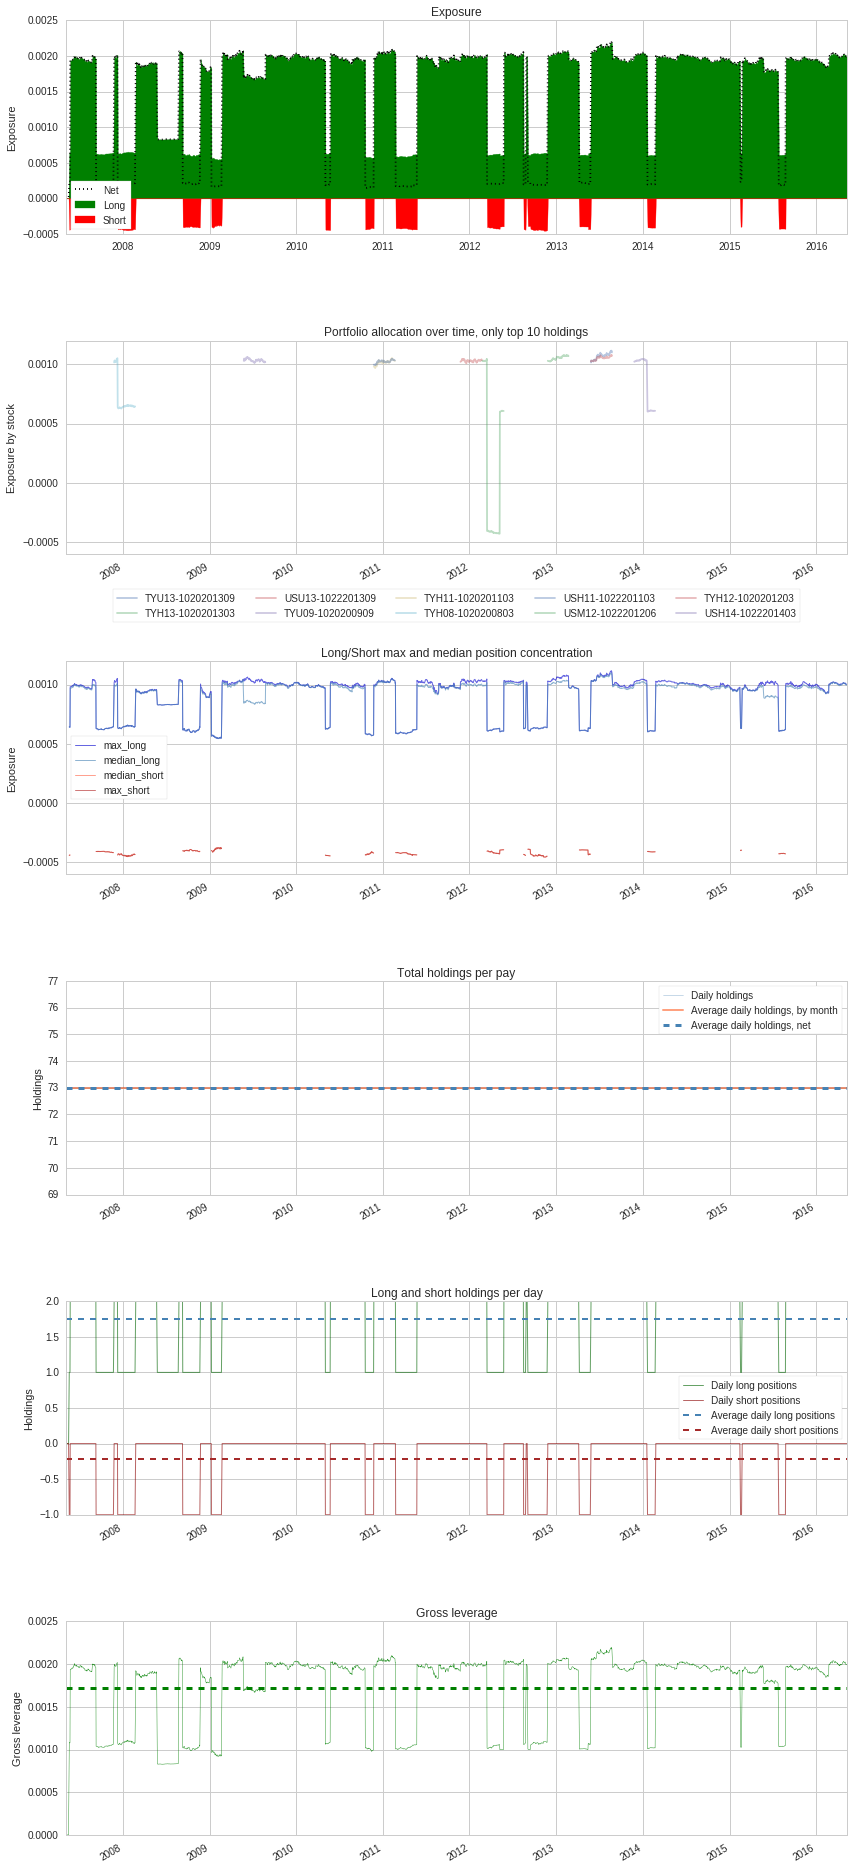

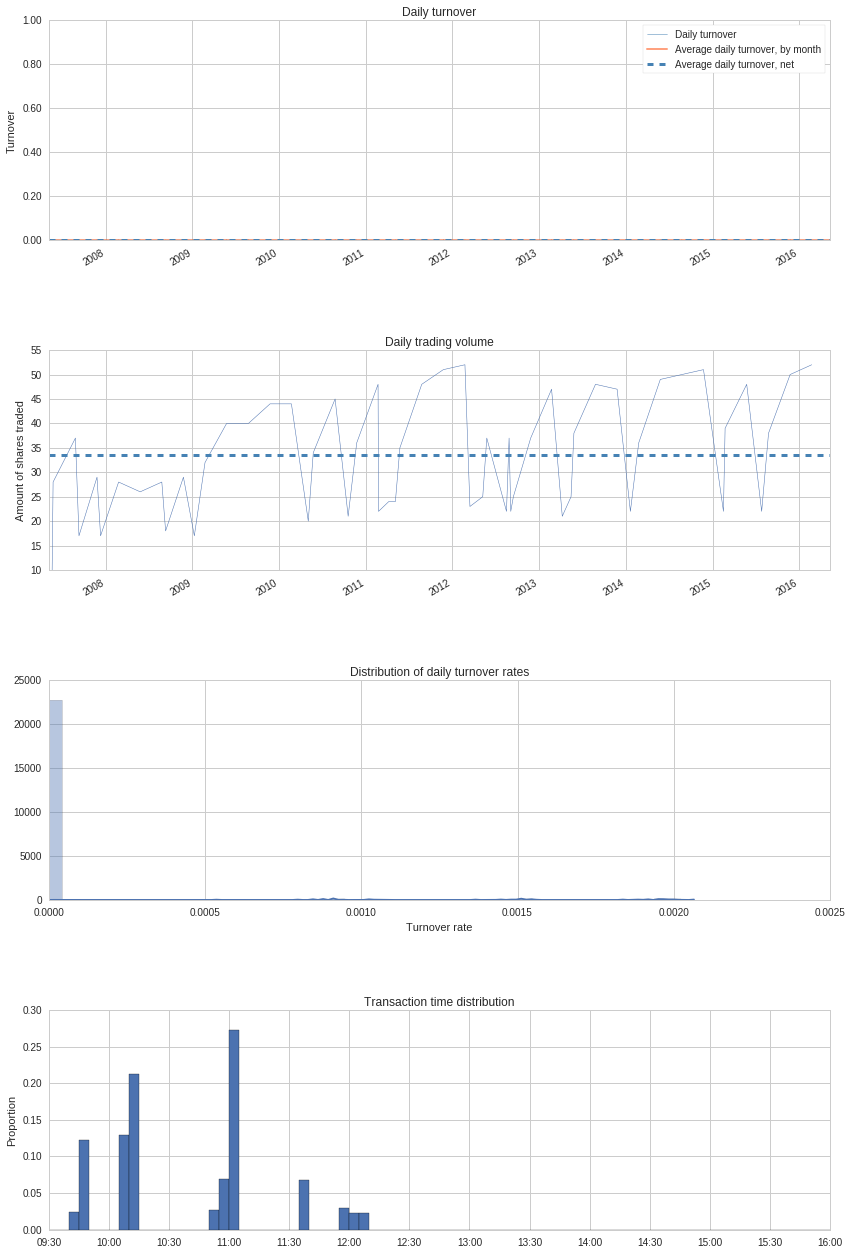

In [23]:
nob_rsi5_bt.create_full_tear_sheet(live_start_date='2014-1-1')

### FITE Spread

The "NOB" Spread is the difference between the 5 & 10 yr UST that is a binary trade where a trader is betting that the yield curve will flatten or steepen. 

The default proportion is 3:2 (FV:TY)

- If you believe that the yield curve will "bull steepen" you sell the front 5 yr UST and buy the back 10 yr UST in a -1:3 ratio.

- If you believe that the yield curve will "bear flatten" you long the front 5 yr UST and sell the back 10 yr UST in a 3:-1.

https://tastytrade.com/tt/blog/fresh-trading-ideas-in-bond-futures

In [24]:
ty_future = continuous_future('TY', offset=0, roll='calendar', adjustment='mul')
ty_prices = history(ty_future, fields='price', start_date='2007-01-01', end_date='2017-06-01')
ty_prices.name = ty_future.root_symbol

fv_future = continuous_future('FV', offset=0, roll='calendar', adjustment='mul')
fv_prices = history(fv_future, fields='price', start_date='2007-01-01', end_date='2017-06-01')
fv_prices.name = fv_future.root_symbol

fite = pd.concat([ty_prices, fv_prices], axis=1)
fite = fite.dropna()
fite.head()

TY         FV
2007-01-02 00:00:00+00:00  79.309500  83.017159
2007-01-03 00:00:00+00:00  79.436211  83.103520
2007-01-04 00:00:00+00:00  79.735710  83.313253
2007-01-05 00:00:00+00:00  79.528365  83.140532
2007-01-08 00:00:00+00:00  79.505326  83.103520

In [25]:
# FITE column calculation
fite['FITE'] = fv_prices / ty_prices
# FITE RSI 14 column
fite['RSI14'] = talib.RSI(fite.FITE, timeperiod=14)
fite['RSI5'] = talib.RSI(fite.FITE, timeperiod=5)
fite.tail()
#rsi_df = pd.DataFrame(rsi).dropna()

TY          FV      FITE      RSI14  \
2017-05-26 00:00:00+00:00  125.890625  118.109375  0.938190  38.007957   
2017-05-29 00:00:00+00:00  125.984375  118.171875  0.937988  37.038660   
2017-05-30 00:00:00+00:00  126.187500  118.273438  0.937283  33.799552   
2017-05-31 00:00:00+00:00  126.234375  118.289062  0.937059  32.816444   
2017-06-01 00:00:00+00:00  126.234375  118.257812  0.936811  31.719684   

                                RSI5  
2017-05-26 00:00:00+00:00  29.499476  
2017-05-29 00:00:00+00:00  26.595064  
2017-05-30 00:00:00+00:00  18.605250  
2017-05-31 00:00:00+00:00  16.619933  
2017-06-01 00:00:00+00:00  14.486942

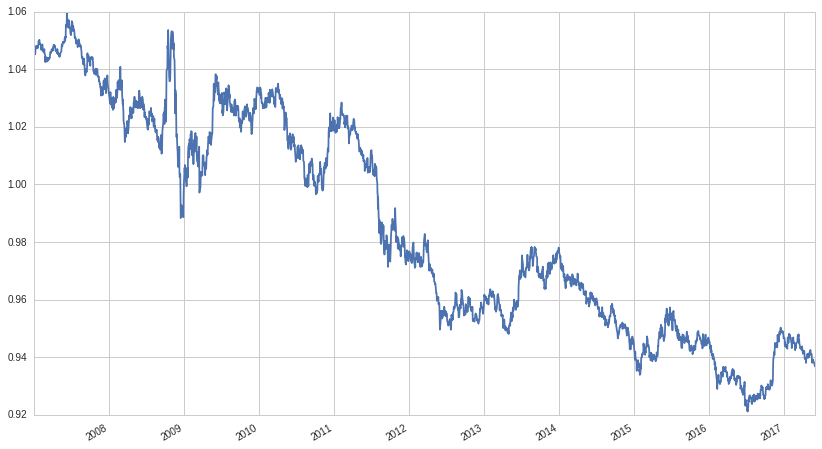

In [26]:
fite['FITE'].plot()
#plt.legend();
#plt.ylabel('NOB Spread')
#data2

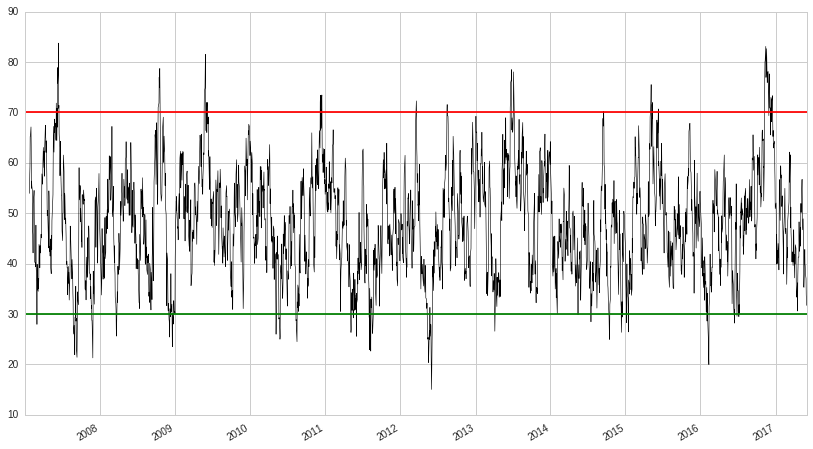

In [27]:
fite['RSI14'].plot(color='black', linewidth=.6)
plt.axhline(y=70, xmin=0, xmax=1, hold=None, color='red')
plt.axhline(y=30, xmin=0, xmax=1, hold=None, color='green')

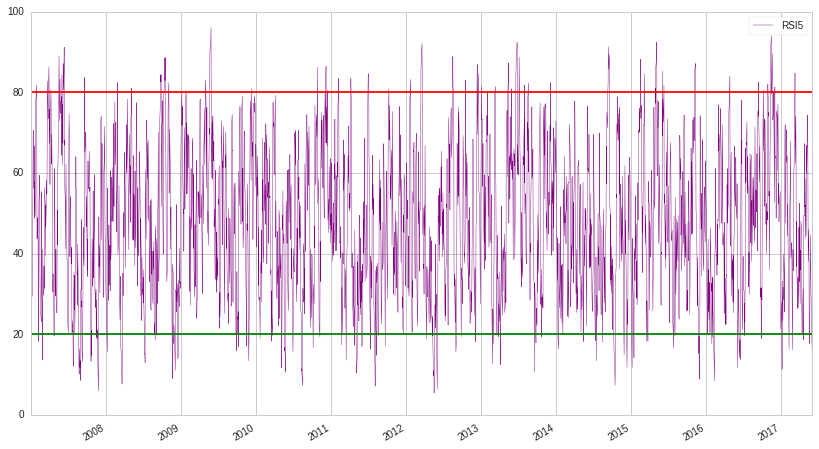

In [28]:
#fite['FITE'].plot()
fite['RSI5'].plot(color='purple', linewidth=.4)
plt.axhline(y=80, xmin=0, xmax=1, hold=None, color='red')
plt.axhline(y=20, xmin=0, xmax=1, hold=None, color='green')
plt.legend();

Hard to tell from the charts/plots if there is a tradeable RSI strategy here given small magnitude of the spread

Time to start backtesting the FITE

In [29]:
# RSI 30/70
fite_rsi14_bt = get_backtest('5939dd8d2479b96da3b5ba1f')

100% Time: 0:00:02|###########################################################|


In [30]:
# RSI 20/80
# with leverage 3:1 ratio
fite_rsi5_bt = get_backtest('5939dcbfd6b1024d4bff9e35')

100% Time: 0:00:01|###########################################################|


Entire data start date: 2007-08-01
Entire data end date: 2016-09-30


Out-of-Sample Months: 33
Backtest Months: 78


Performance statistics   All history  Backtest  Out of sample
annual_return                   0.09      0.10           0.07
cum_returns_final               1.27      0.88           0.21
annual_volatility               0.11      0.12           0.08
sharpe_ratio                    0.86      0.87           0.89
calmar_ratio                    0.68      0.75           1.25
stability_of_timeseries         0.90      0.93           0.91
max_drawdown                   -0.13     -0.13          -0.06
omega_ratio                     1.16      1.16           1.16
sortino_ratio                   1.28      1.30           1.31
skew                            0.21      0.22          -0.01
kurtosis                        4.09      3.67           1.07
tail_ratio                      1.01      0.98           1.08
common_sense_ratio              1.10      1.08           1.16
gross_leverage                  0.00      0.00           0.00
information_ratio               0.00      0.00          -0.01
alpha                           0.11      0.12           0.09
beta                           -0.22     -0.22          -0.20

Worst drawdown periods net drawdown in %  peak date valley date recovery date  \
0                                  13.48 2009-03-18  2009-06-08    2009-11-26   
1                                  12.75 2010-11-04  2011-02-08    2011-06-23   
2                                  11.01 2013-05-02  2013-09-05    2014-10-13   
3                                   9.51 2008-03-17  2008-06-16    2008-09-15   
4                                   9.18 2008-09-15  2008-10-14    2008-11-14   

Worst drawdown periods duration  
0                           182  
1                           166  
2                           378  
3                           131  
4                            45



[-0.013 -0.027]


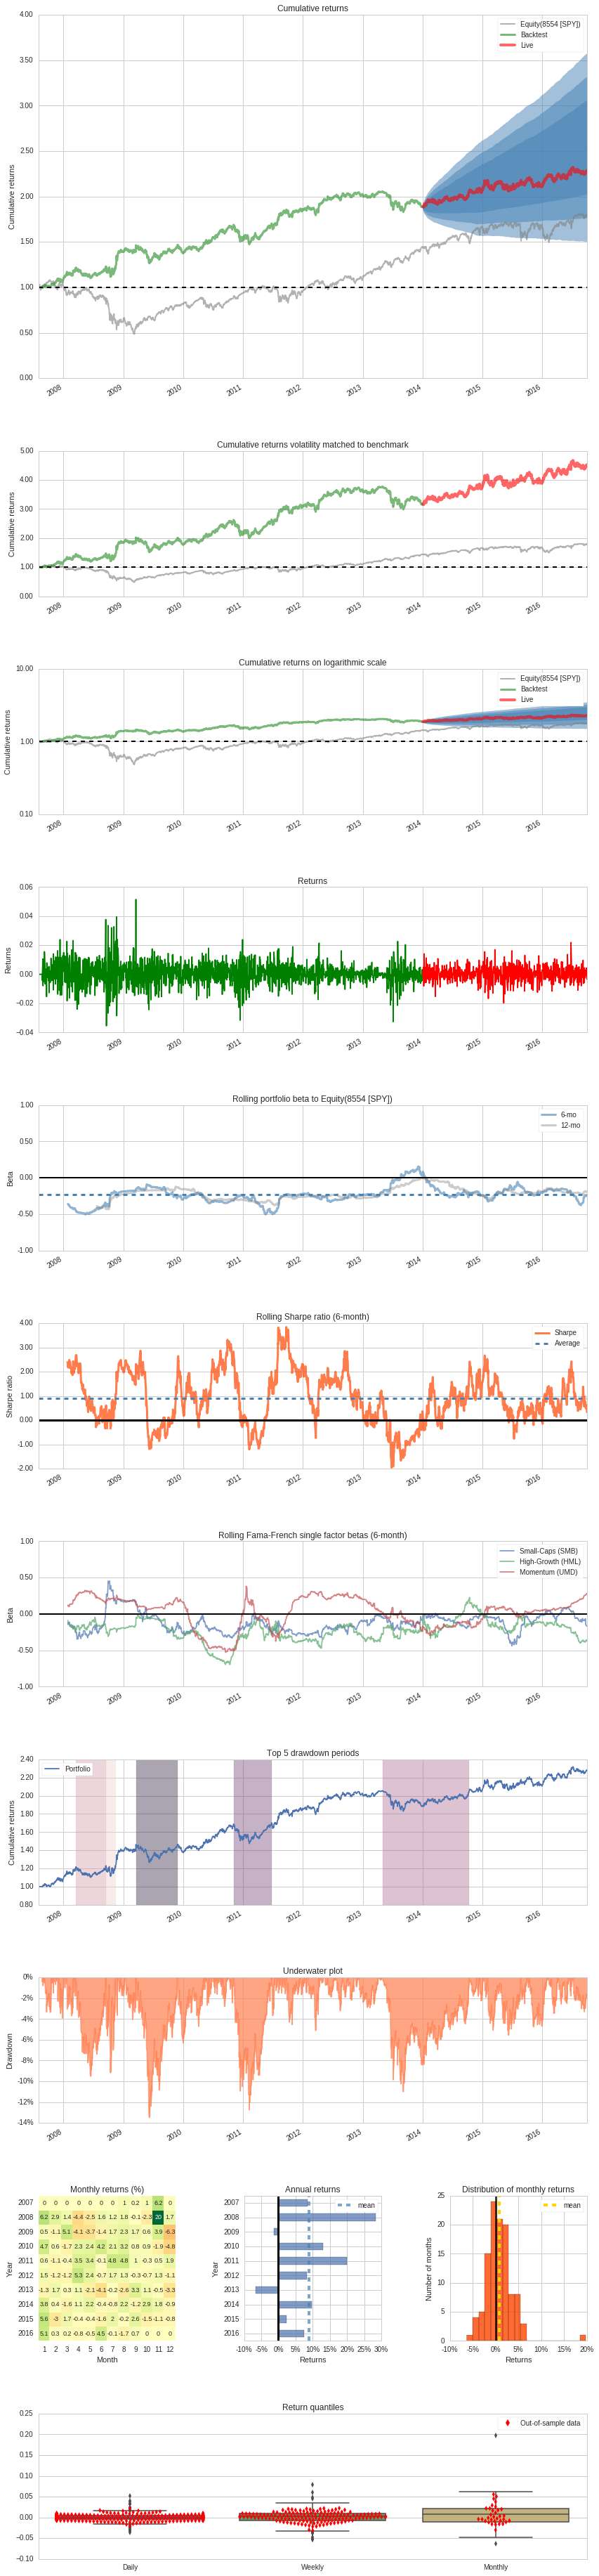

Stress Events                       mean    min   max
Lehmann                            0.06% -3.55% 3.77%
US downgrade/European Debt Crisis  0.17% -1.51% 1.76%
Fukushima                         -0.04% -0.88% 1.33%
EZB IR Event                       0.02% -1.04% 0.58%
Aug07                              0.04% -0.79% 1.06%
Mar08                             -0.03% -2.40% 1.50%
Sept08                             0.04% -3.55% 3.77%
2009Q1                            -0.01% -1.29% 1.26%
2009Q2                            -0.07% -2.02% 5.15%
Flash Crash                        0.25% -0.98% 1.27%
Apr14                              0.06% -0.88% 1.08%
Oct14                              0.13% -0.63% 1.03%
Fall2015                           0.09% -1.16% 1.31%
Low Volatility Bull Market         0.00%  0.00% 0.00%
GFC Crash                          0.09% -3.55% 5.15%
Recovery                           0.04% -3.17% 2.39%
New Normal                         0.01% -3.27% 2.26%

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=732889.0, right=732889.0
  'left=%s, right=%s') % (left, right))


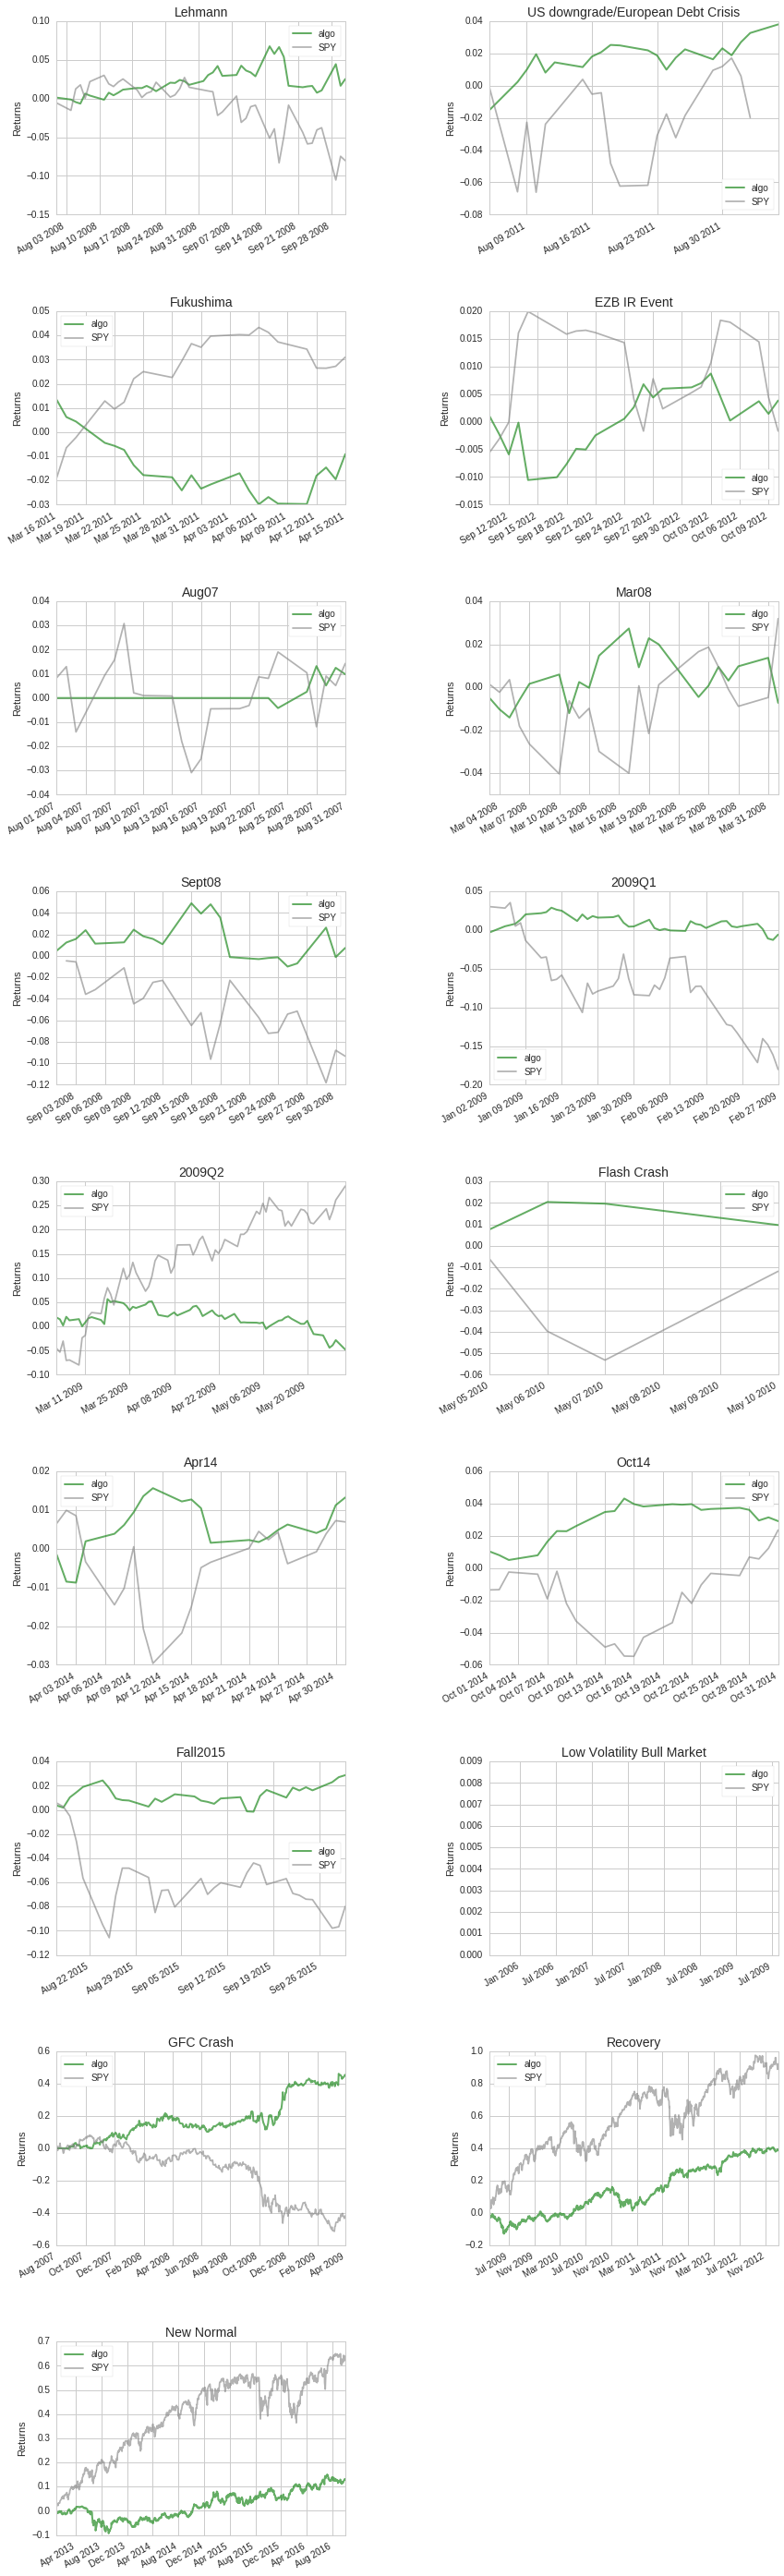

Top 10 long positions of all time   max
TYH11-1020201103                  0.31%
TYZ08-1020200812                  0.31%
TYU13-1020201309                  0.31%
TYM09-1020200906                  0.31%
TYM15-1020201506                  0.30%
FVM12-1009201206                  0.30%
FVM10-1009201006                  0.30%
FVM11-1009201106                  0.30%
FVH09-1009200903                  0.30%
FVH16-1009201603                  0.30%

Top 10 short positions of all time    max
FVU13-1009201309                   -0.10%
TYM10-1020201006                   -0.10%
FVM15-1009201506                   -0.10%
FVM09-1009200906                   -0.10%
FVH11-1009201103                   -0.10%
TYM12-1020201206                   -0.10%
FVM12-1009201206                   -0.10%
FVU12-1009201209                   -0.10%
FVZ08-1009200812                   -0.10%
TYH09-1020200903                   -0.10%

Top 10 positions of all time   max
TYH11-1020201103             0.31%
TYZ08-1020200812             0.31%
TYU13-1020201309             0.31%
TYM09-1020200906             0.31%
TYM15-1020201506             0.30%
FVM12-1009201206             0.30%
FVM10-1009201006             0.30%
FVM11-1009201106             0.30%
FVH09-1009200903             0.30%
FVH16-1009201603             0.30%

All positions ever held   max
TYH11-1020201103        0.31%
TYZ08-1020200812        0.31%
TYU13-1020201309        0.31%
TYM09-1020200906        0.31%
TYM15-1020201506        0.30%
FVM12-1009201206        0.30%
FVM10-1009201006        0.30%
FVM11-1009201106        0.30%
FVH09-1009200903        0.30%
FVH16-1009201603        0.30%
TYM12-1020201206        0.30%
FVU07-1009200709        0.30%
FVZ14-1009201412        0.30%
FVM13-1009201306        0.30%
TYU12-1020201209        0.30%
TYU09-1020200909        0.11%
FVU09-1009200909        0.11%
TYH08-1020200803        0.11%
FVU13-1009201309        0.11%
FVH11-1009201103        0.10%
FVZ10-1009201012        0.10%
TYU10-1020201009        0.10%
TYH14-1020201403        0.10%
TYM10-1020201006        0.10%
FVZ13-1009201312        0.10%
FVU15-1009201509        0.10%
FVM15-1009201506        0.10%
FVH08-1009200803        0.10%
FVU14-1009201409        0.10%
FVZ11-1009201112        0.10%
...                       ...
TYZ10-1020201012        0.10%
TYM16-1020201606        0.10%
TYZ11-1020201112        0.10%
FVZ08-1009200812        0.10%
TYM11-1020201106        0.10%
FVH12-1009201203        0.10%
TYH10-1020201003        0.10%
TYH09-1020200903        0.10%
TYZ13-1020201312        0.10%
TYU16-1020201609        0.10%
FVH10-1009201003        0.10%
FVH13-1009201303        0.10%
FVM16-1009201606        0.10%
FVZ12-1009201212        0.10%
TYZ12-1020201212        0.10%
FVM14-1009201406        0.10%
TYH12-1020201203        0.10%
FVM08-1009200806        0.10%
TYH13-1020201303        0.10%
TYH15-1020201503        0.10%
TYZ16-1020201612        0.10%
FVH15-1009201503        0.10%
FVU16-1009201609        0.10%
TYU07-1020200709        0.10%
TYM13-1020201306        0.10%
TYZ07-1020200712        0.10%
TYU11-1020201109        0.10%
FVZ07-1009200712        0.10%
TYU08-1020200809        0.08%
FVU08-1009200809        0.06%

[76 rows x 1 columns]

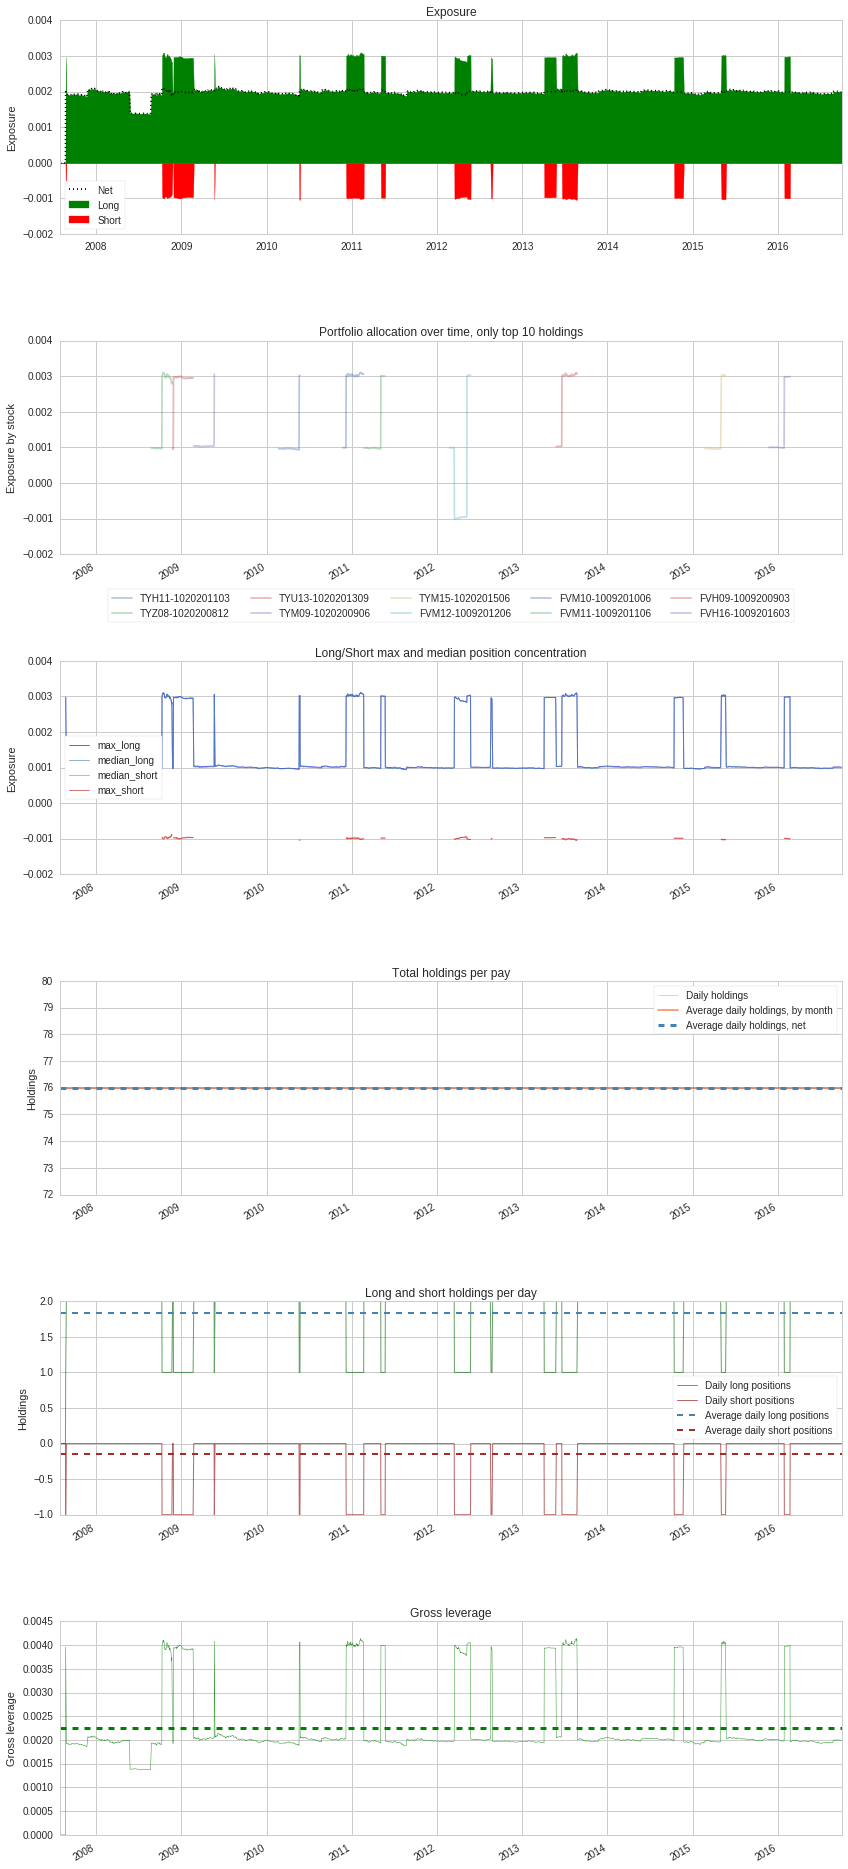

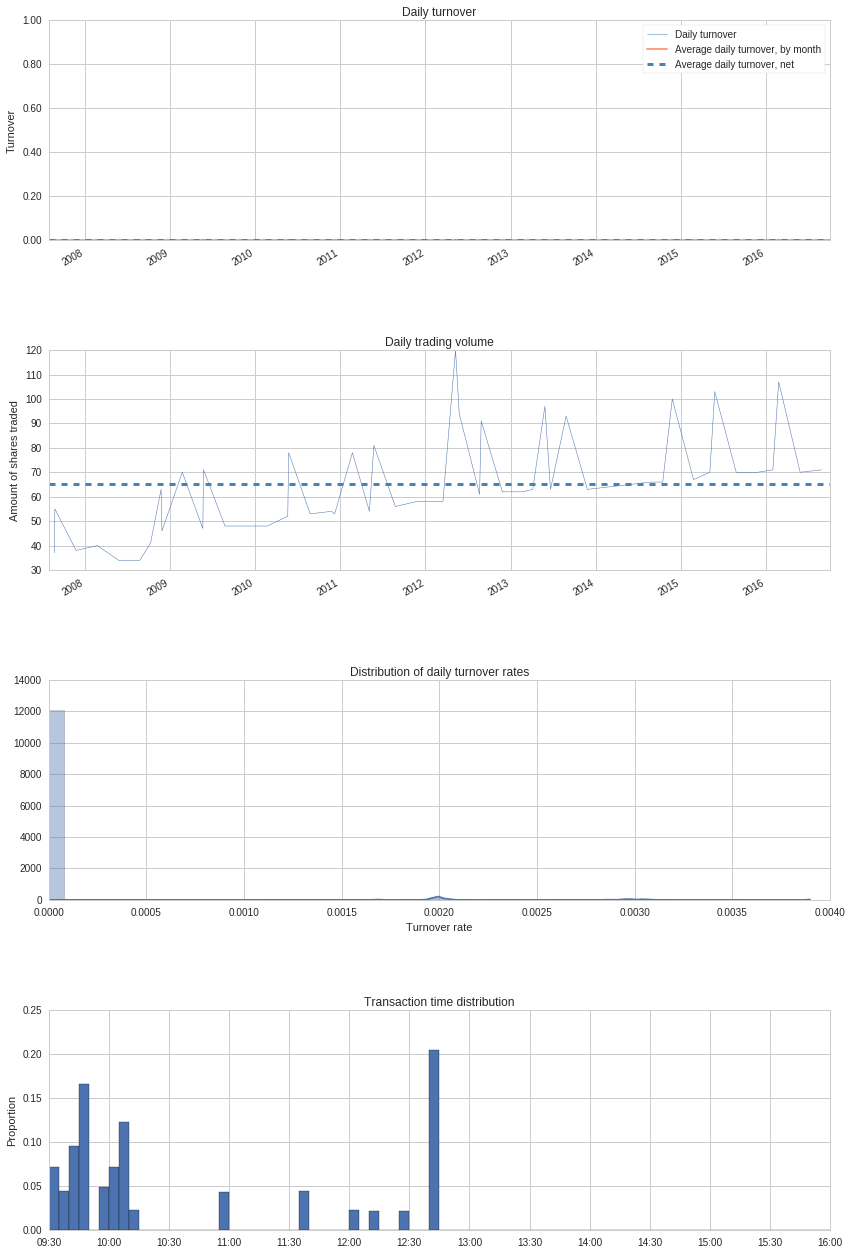

In [31]:
# RSI 20/80
fite_rsi14_bt.create_full_tear_sheet(live_start_date='2014-1-1')

Entire data start date: 2007-08-01
Entire data end date: 2016-09-30


Out-of-Sample Months: 33
Backtest Months: 78


Performance statistics   All history  Backtest  Out of sample
annual_return                   0.10      0.11           0.07
cum_returns_final               1.38      0.96           0.21
annual_volatility               0.11      0.12           0.08
sharpe_ratio                    0.90      0.91           0.94
calmar_ratio                    0.62      0.69           1.43
stability_of_timeseries         0.89      0.93           0.89
max_drawdown                   -0.16     -0.16          -0.05
omega_ratio                     1.17      1.17           1.17
sortino_ratio                   1.33      1.35           1.38
skew                            0.13      0.13          -0.03
kurtosis                        3.78      3.18           1.32
tail_ratio                      1.03      0.98           1.09
common_sense_ratio              1.13      1.08           1.17
gross_leverage                  0.00      0.00           0.00
information_ratio               0.00      0.01          -0.01
alpha                           0.12      0.13           0.08
beta                           -0.21     -0.22          -0.18

Worst drawdown periods net drawdown in %  peak date valley date recovery date  \
0                                  15.62 2009-01-14  2009-06-08    2010-04-30   
1                                  10.97 2010-11-04  2011-02-08    2011-05-06   
2                                  10.39 2012-12-12  2013-09-05    2014-10-07   
3                                   9.14 2008-09-15  2008-10-14    2008-11-14   
4                                   8.98 2008-03-17  2008-06-16    2008-09-15   

Worst drawdown periods duration  
0                           338  
1                           132  
2                           475  
3                            45  
4                           131



[-0.013 -0.027]


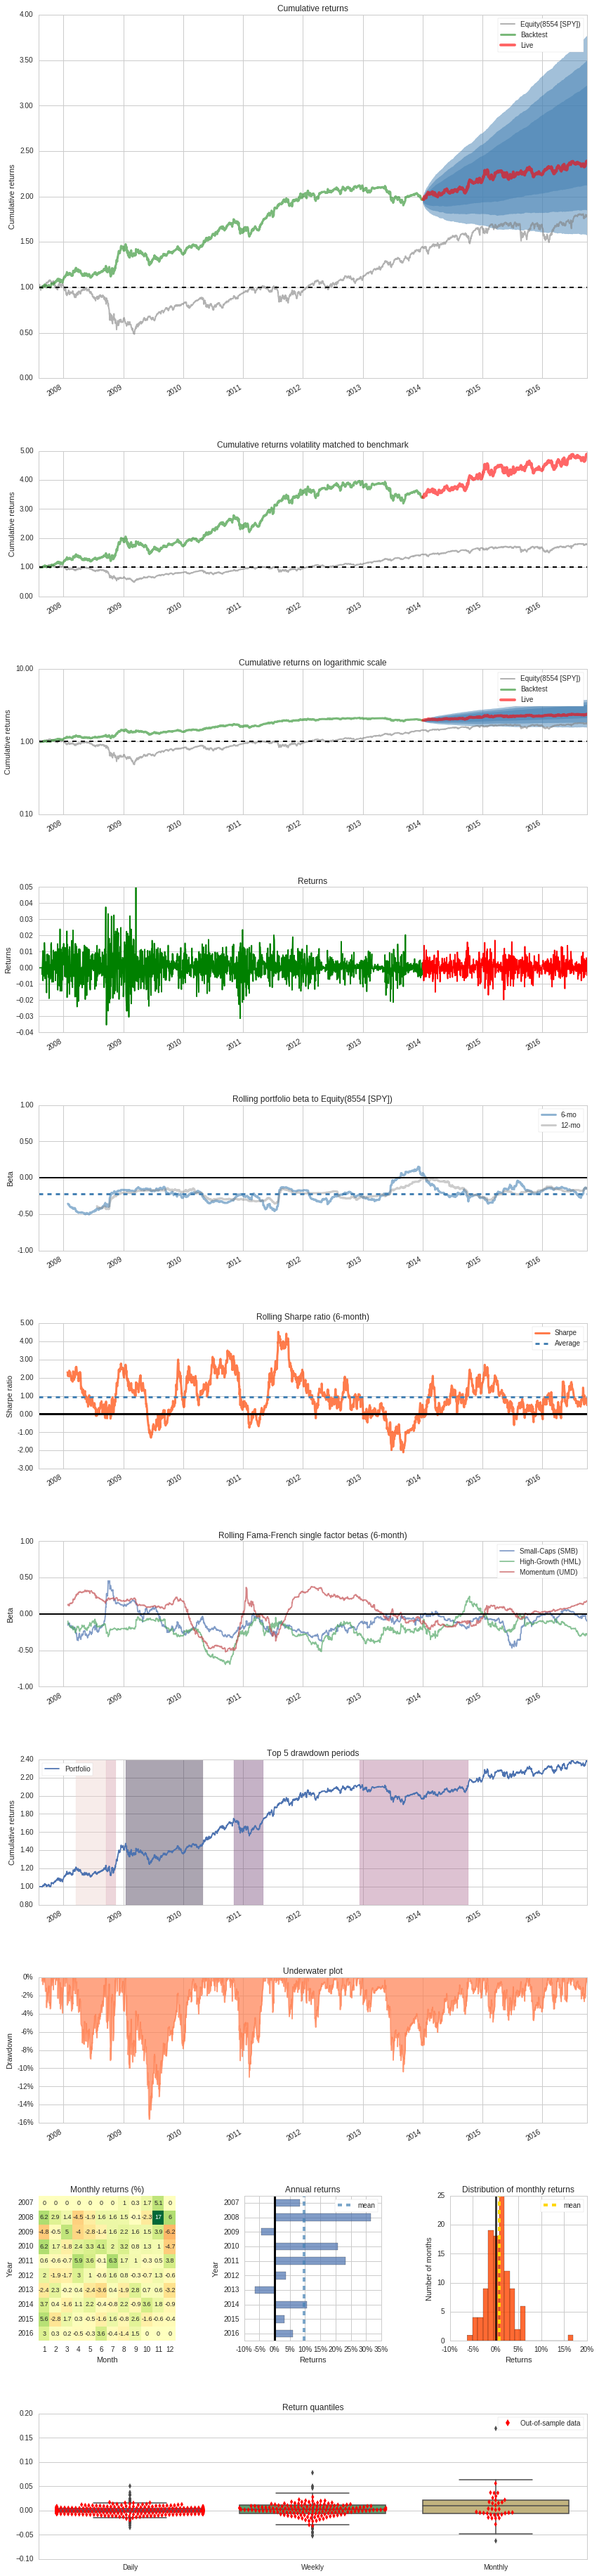

Stress Events                       mean    min   max
Lehmann                            0.06% -3.53% 3.76%
US downgrade/European Debt Crisis  0.12% -0.76% 0.80%
Fukushima                          0.06% -0.76% 1.57%
EZB IR Event                       0.02% -1.07% 0.60%
Aug07                              0.04% -0.79% 1.06%
Mar08                             -0.03% -2.41% 1.50%
Sept08                             0.04% -3.53% 3.76%
2009Q1                            -0.12% -3.05% 3.21%
2009Q2                            -0.06% -1.95% 5.00%
Flash Crash                        0.25% -0.98% 1.28%
Apr14                              0.06% -0.87% 1.06%
Oct14                              0.16% -0.64% 1.59%
Fall2015                           0.07% -1.17% 1.31%
Low Volatility Bull Market         0.00%  0.00% 0.00%
GFC Crash                          0.09% -3.53% 5.00%
Recovery                           0.04% -3.13% 2.36%
New Normal                         0.01% -2.13% 2.04%

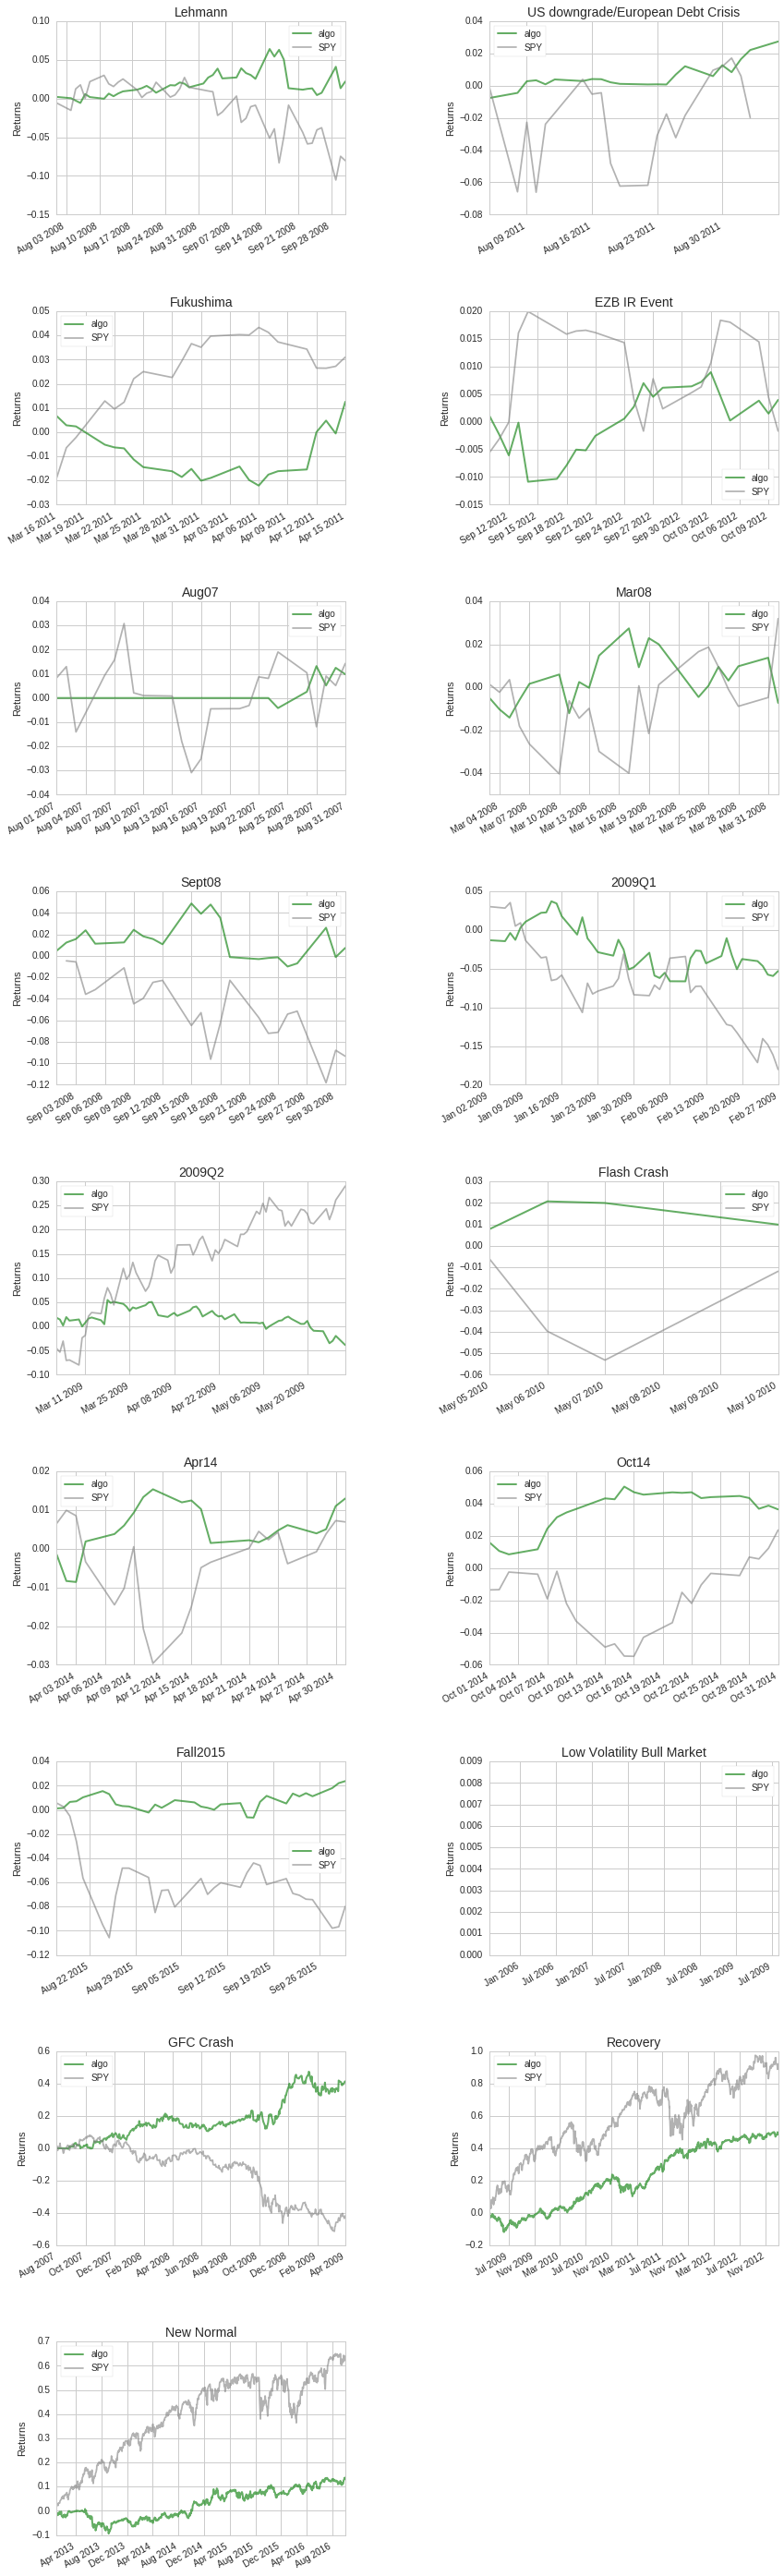

Top 10 long positions of all time   max
TYH09-1020200903                  0.31%
TYH11-1020201103                  0.31%
TYZ08-1020200812                  0.31%
TYH13-1020201303                  0.31%
TYZ07-1020200712                  0.30%
TYM13-1020201306                  0.30%
FVM12-1009201206                  0.30%
TYZ14-1020201412                  0.30%
TYM15-1020201506                  0.30%
FVU15-1009201509                  0.30%

Top 10 short positions of all time    max
FVH09-1009200903                   -0.11%
FVH11-1009201103                   -0.10%
FVU12-1009201209                   -0.10%
FVH13-1009201303                   -0.10%
TYZ09-1020200912                   -0.10%
TYM15-1020201506                   -0.10%
FVM15-1009201506                   -0.10%
TYZ08-1020200812                   -0.10%
TYZ10-1020201012                   -0.10%
TYU11-1020201109                   -0.10%

Top 10 positions of all time   max
TYH09-1020200903             0.31%
TYH11-1020201103             0.31%
TYZ08-1020200812             0.31%
TYH13-1020201303             0.31%
TYZ07-1020200712             0.30%
TYM13-1020201306             0.30%
FVM12-1009201206             0.30%
TYZ14-1020201412             0.30%
TYM15-1020201506             0.30%
FVU15-1009201509             0.30%

All positions ever held   max
TYH09-1020200903        0.31%
TYH11-1020201103        0.31%
TYZ08-1020200812        0.31%
TYH13-1020201303        0.31%
TYZ07-1020200712        0.30%
TYM13-1020201306        0.30%
FVM12-1009201206        0.30%
TYZ14-1020201412        0.30%
TYM15-1020201506        0.30%
FVU15-1009201509        0.30%
FVU11-1009201109        0.30%
FVZ13-1009201312        0.30%
FVM13-1009201306        0.30%
TYU11-1020201109        0.30%
FVZ09-1009200912        0.30%
FVZ07-1009200712        0.30%
FVZ10-1009201012        0.30%
TYZ16-1020201612        0.30%
TYZ15-1020201512        0.30%
TYH15-1020201503        0.30%
FVH16-1009201603        0.30%
FVZ08-1009200812        0.30%
FVU08-1009200809        0.30%
FVM11-1009201106        0.30%
TYM16-1020201606        0.30%
TYU12-1020201209        0.30%
TYZ10-1020201012        0.30%
FVH13-1009201303        0.30%
FVZ14-1009201412        0.30%
FVH10-1009201003        0.30%
...                       ...
TYU14-1020201409        0.10%
FVH14-1009201403        0.10%
TYU13-1020201309        0.10%
FVZ11-1009201112        0.10%
TYZ13-1020201312        0.10%
TYZ09-1020200912        0.10%
TYU15-1020201509        0.10%
TYU10-1020201009        0.10%
TYZ12-1020201212        0.10%
FVZ12-1009201212        0.10%
TYH16-1020201603        0.10%
FVZ15-1009201512        0.10%
TYU16-1020201609        0.10%
TYZ11-1020201112        0.10%
FVM14-1009201406        0.10%
FVM16-1009201606        0.10%
FVH12-1009201203        0.10%
TYH14-1020201403        0.10%
TYU09-1020200909        0.10%
TYU08-1020200809        0.10%
FVU10-1009201009        0.10%
FVM08-1009200806        0.10%
FVH15-1009201503        0.10%
FVU14-1009201409        0.10%
FVZ16-1009201612        0.10%
TYM14-1020201406        0.10%
TYM09-1020200906        0.10%
TYM12-1020201206        0.10%
TYU07-1020200709        0.10%
TYM10-1020201006        0.10%

[76 rows x 1 columns]

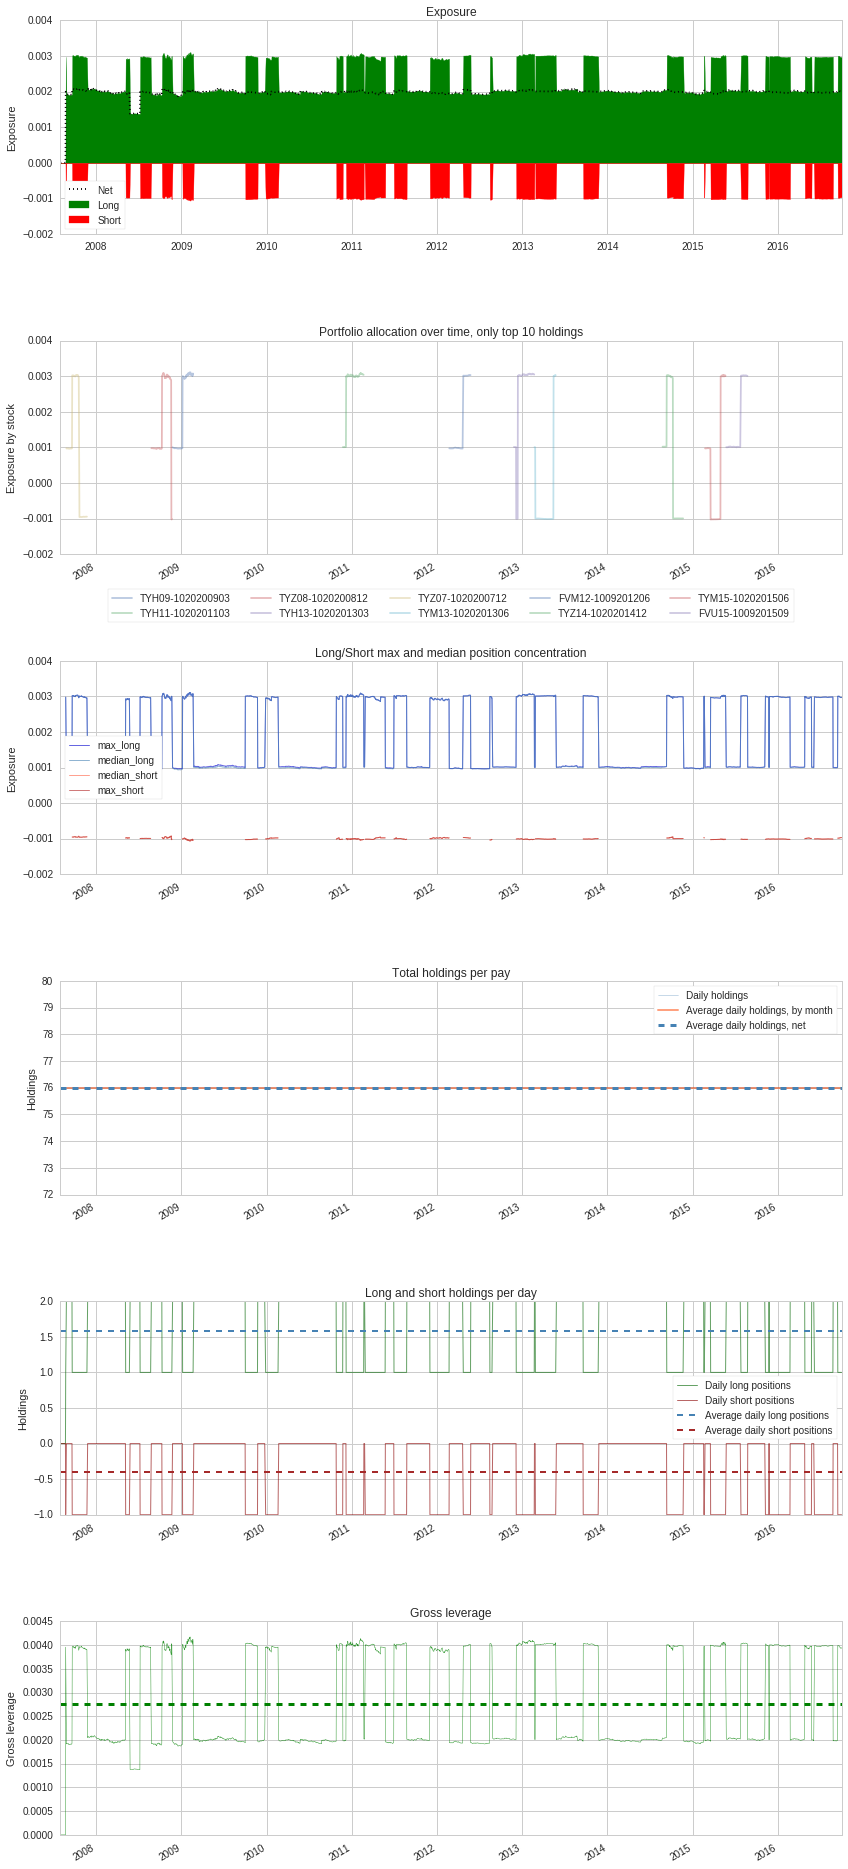

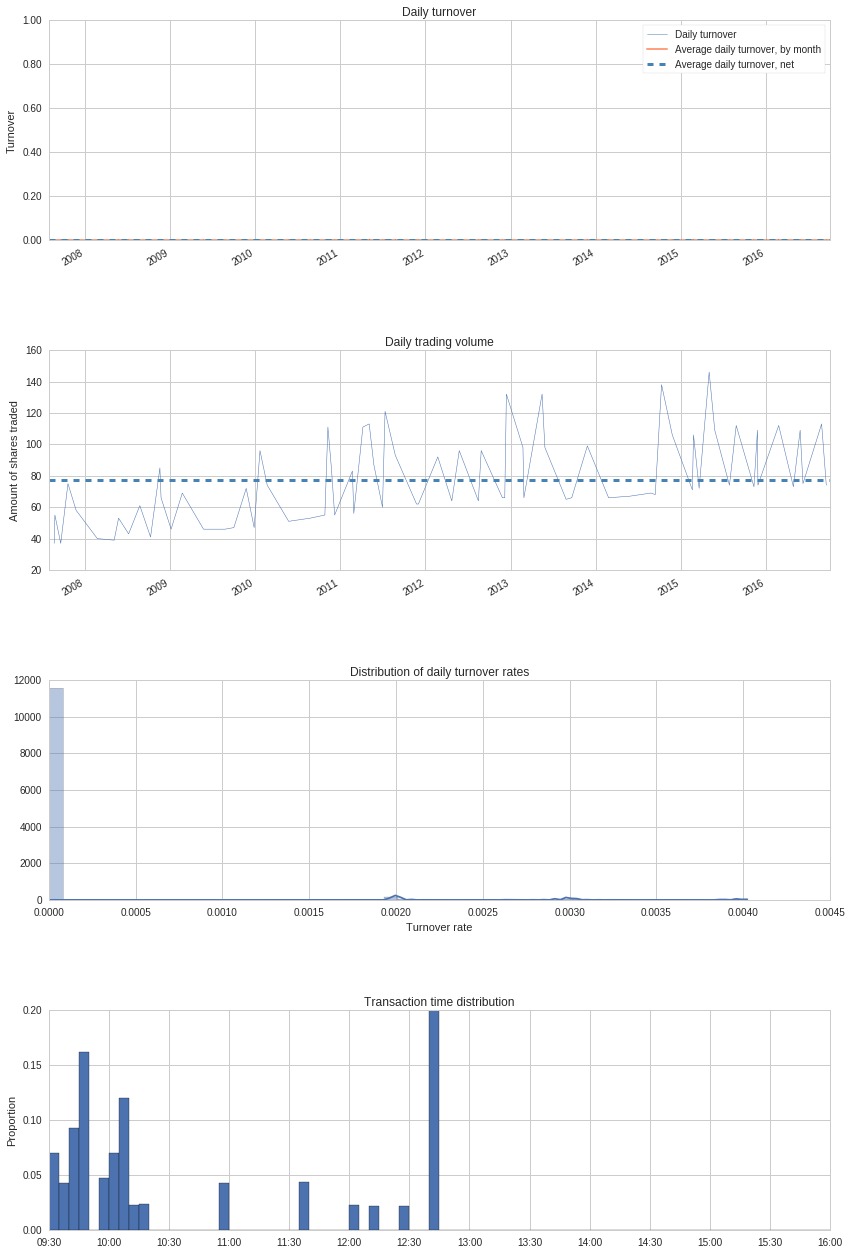

In [32]:
fite_rsi5_bt.create_full_tear_sheet(live_start_date='2014-1-1')

###TUT Spread

The "TUT" Spread is the difference between the 2 & 10 yr UST that is a binary trade where a trader is betting that front end of the yield curve will flatten or steepen. 

The default proportion is 1:1 (TU:TY)

- If you believe that the yield curve will "bull steepen" you sell the front 2 yr UST and buy the back 10 yr UST contracts in a -1:1 ratio.

- If you believe that the yield curve will "bear flatten" you buy the front 2 yr UST and sell the 10 yr contracts in a 1:-1 ratio.

https://www.tastytrade.com/tt/shows/closing-the-gap-futures-edition/episodes/yield-curve-trade-ideas-03-17-2017?utm_campaign=archive&utm_medium=link&utm_source=social-share

In [33]:
ty_future = continuous_future('TY', offset=0, roll='calendar', adjustment='mul')
ty_prices = history(ty_future, fields='price', start_date='2007-01-01', end_date='2017-06-01')
ty_prices.name = ty_future.root_symbol

tu_future = continuous_future('TU', offset=0, roll='calendar', adjustment='mul')
tu_prices = history(tu_future, fields='price', start_date='2007-01-01', end_date='2017-06-01')
tu_prices.name = tu_future.root_symbol

tut = pd.concat([ty_prices, tu_prices], axis=1)
tut = tut.dropna()
tut.head()

TY         TU
2007-01-02 00:00:00+00:00  79.309500  93.763069
2007-01-03 00:00:00+00:00  79.436211  93.820491
2007-01-04 00:00:00+00:00  79.735710  93.920980
2007-01-05 00:00:00+00:00  79.528365  93.834847
2007-01-08 00:00:00+00:00  79.505326  93.777425

In [34]:
# NOB column calculation
tut['TUT'] = tu_prices / ty_prices
# NOB RSI 14 column
tut['RSI14'] = talib.RSI(tut.TUT, timeperiod=14)
tut['RSI5'] = talib.RSI(tut.TUT, timeperiod=5)
tut.tail()
#rsi_df = pd.DataFrame(rsi).dropna()

TY          TU       TUT      RSI14  \
2017-05-26 00:00:00+00:00  125.890625  108.203125  0.859501  39.482688   
2017-05-29 00:00:00+00:00  125.984375  108.210938  0.858923  38.105207   
2017-05-30 00:00:00+00:00  126.187500  108.226562  0.857665  35.221106   
2017-05-31 00:00:00+00:00  126.234375  108.226562  0.857346  34.509440   
2017-06-01 00:00:00+00:00  126.234375  108.203125  0.857161  34.077152   

                                RSI5  
2017-05-26 00:00:00+00:00  33.872374  
2017-05-29 00:00:00+00:00  29.429482  
2017-05-30 00:00:00+00:00  21.681833  
2017-05-31 00:00:00+00:00  20.015396  
2017-06-01 00:00:00+00:00  18.953818

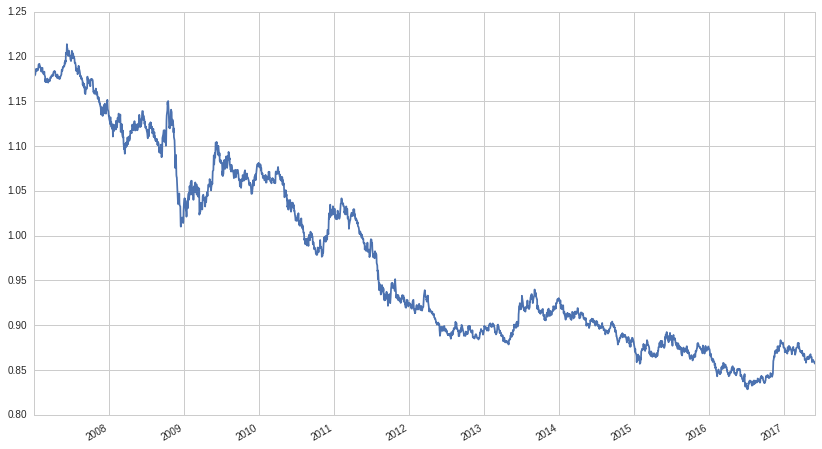

In [35]:
tut['TUT'].plot()
#plt.legend();
#plt.ylabel('NOB Spread')
#data2

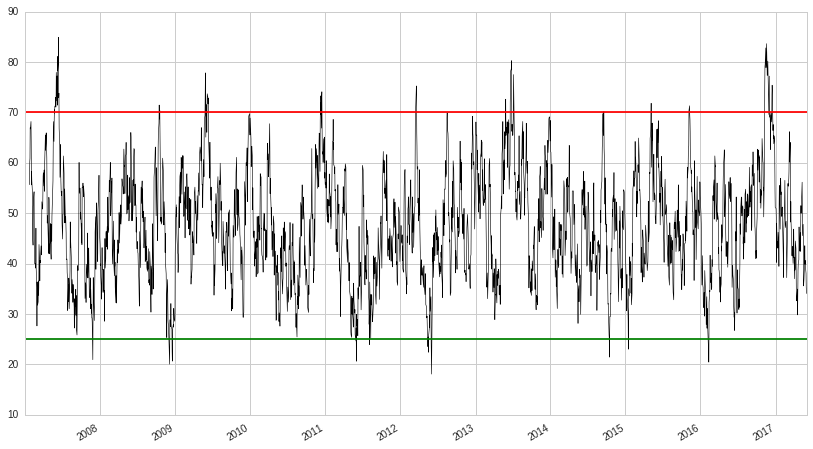

In [36]:
# TUT RSI 14
tut['RSI14'].plot(color='black', linewidth=.6)
plt.axhline(y=70, xmin=0, xmax=1, hold=None, color='red')
plt.axhline(y=25, xmin=0, xmax=1, hold=None, color='green')

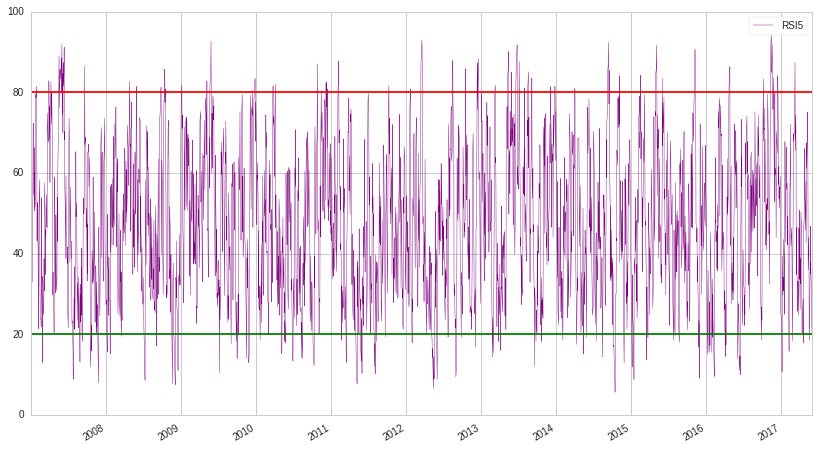

In [37]:
# TUT RSI 5
#tut['TUT'].plot()
tut['RSI5'].plot(color='purple', linewidth=.4)
plt.axhline(y=80, xmin=0, xmax=1, hold=None, color='red')
plt.axhline(y=20, xmin=0, xmax=1, hold=None, color='green')
plt.legend();

In [38]:
tut_rsi14_bt = get_backtest('5939d9791a60ec6983062c11')

100% Time: 0:00:01|###########################################################|


Entire data start date: 2007-01-02
Entire data end date: 2017-06-07


Out-of-Sample Months: 42
Backtest Months: 86


Performance statistics   All history  Backtest  Out of sample
annual_return                   0.05      0.05           0.03
cum_returns_final               0.62      0.46           0.11
annual_volatility               0.07      0.07           0.05
sharpe_ratio                    0.70      0.75           0.57
calmar_ratio                    0.57      0.67           0.38
stability_of_timeseries         0.89      0.93           0.63
max_drawdown                   -0.08     -0.08          -0.08
omega_ratio                     1.13      1.14           1.10
sortino_ratio                   1.04      1.13           0.83
skew                            0.34      0.37           0.06
kurtosis                        5.58      5.58           1.18
tail_ratio                      1.06      1.04           0.99
common_sense_ratio              1.11      1.10           1.02
gross_leverage                  0.00      0.00           0.00
information_ratio              -0.01     -0.01          -0.03
alpha                           0.06      0.07           0.05
beta                           -0.15     -0.15          -0.15

Worst drawdown periods net drawdown in %  peak date valley date recovery date  \
0                                   8.18 2008-12-18  2009-06-10    2010-05-20   
1                                   7.82 2016-07-05  2016-12-15           NaT   
2                                   7.39 2013-05-02  2013-09-05    2014-10-15   
3                                   7.36 2010-11-04  2011-02-08    2011-06-08   
4                                   6.99 2008-03-17  2008-06-16    2008-09-15   

Worst drawdown periods duration  
0                           371  
1                           NaN  
2                           380  
3                           155  
4                           131



[-0.008 -0.016]


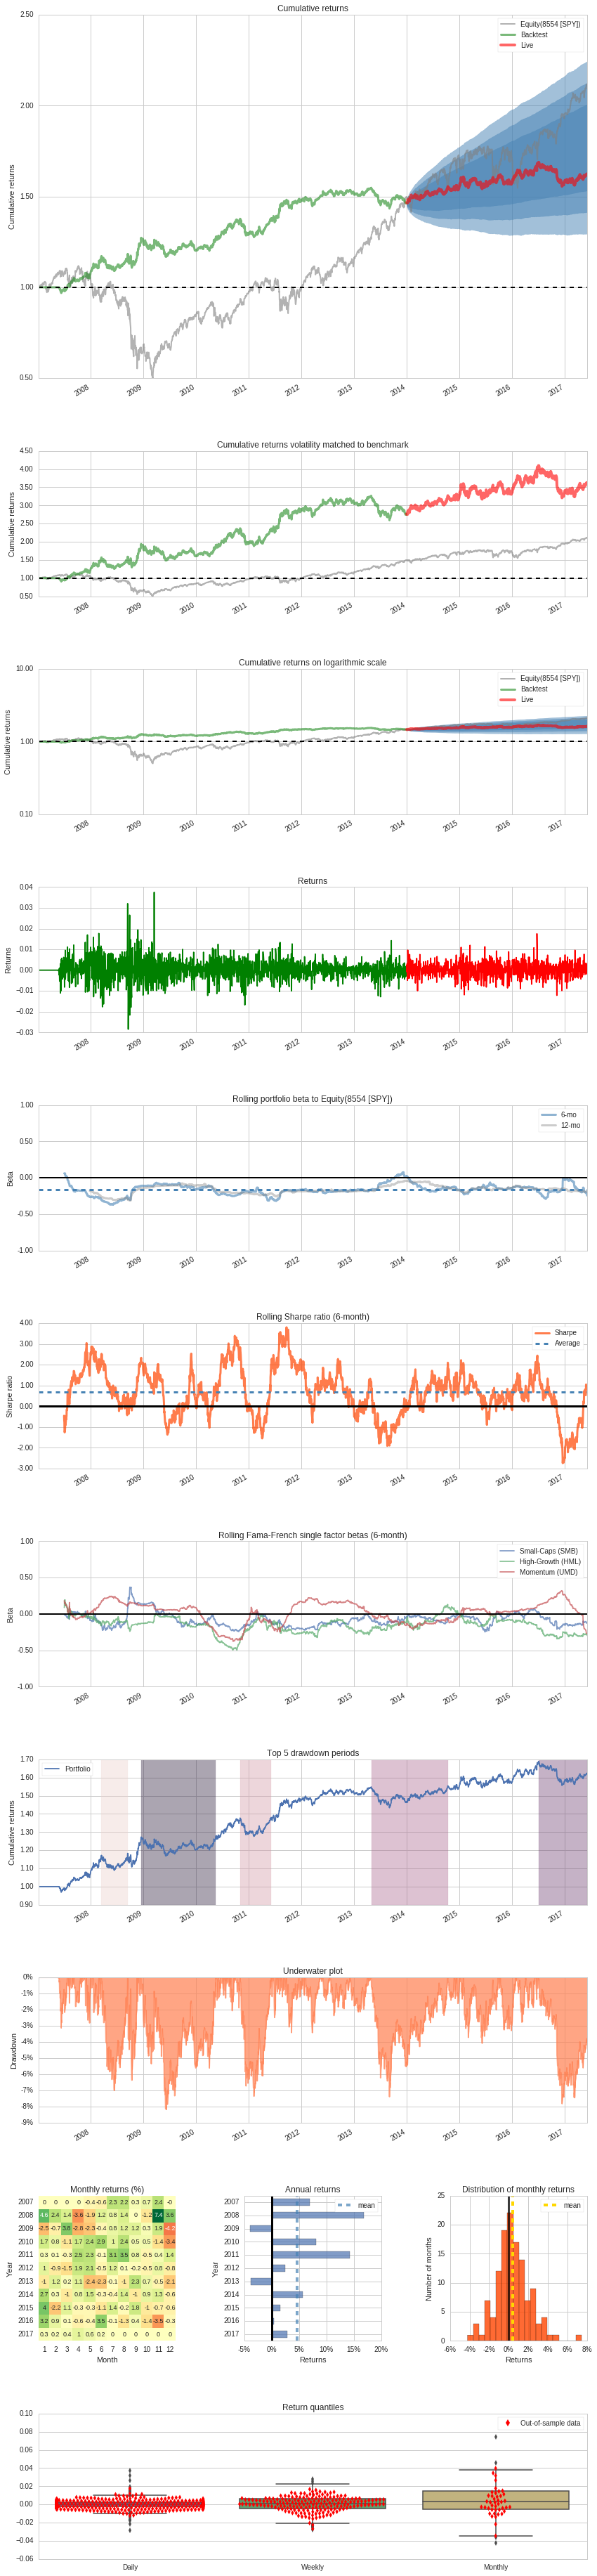

Stress Events                       mean    min   max
Lehmann                            0.05% -2.85% 3.20%
US downgrade/European Debt Crisis  0.13% -1.04% 1.34%
Fukushima                         -0.02% -0.57% 0.97%
EZB IR Event                       0.01% -0.79% 0.40%
Aug07                              0.10% -0.83% 1.03%
Mar08                             -0.01% -1.77% 1.16%
Sept08                             0.04% -2.85% 3.20%
2009Q1                            -0.08% -1.16% 1.08%
2009Q2                            -0.04% -1.12% 3.75%
Flash Crash                        0.18% -0.73% 0.99%
Apr14                              0.05% -0.63% 0.75%
Oct14                              0.04% -0.34% 0.55%
Fall2015                           0.06% -0.83% 0.92%
Low Volatility Bull Market         0.01% -1.10% 1.11%
GFC Crash                          0.05% -2.85% 3.75%
Recovery                           0.02% -1.68% 1.34%
New Normal                         0.01% -1.28% 1.75%

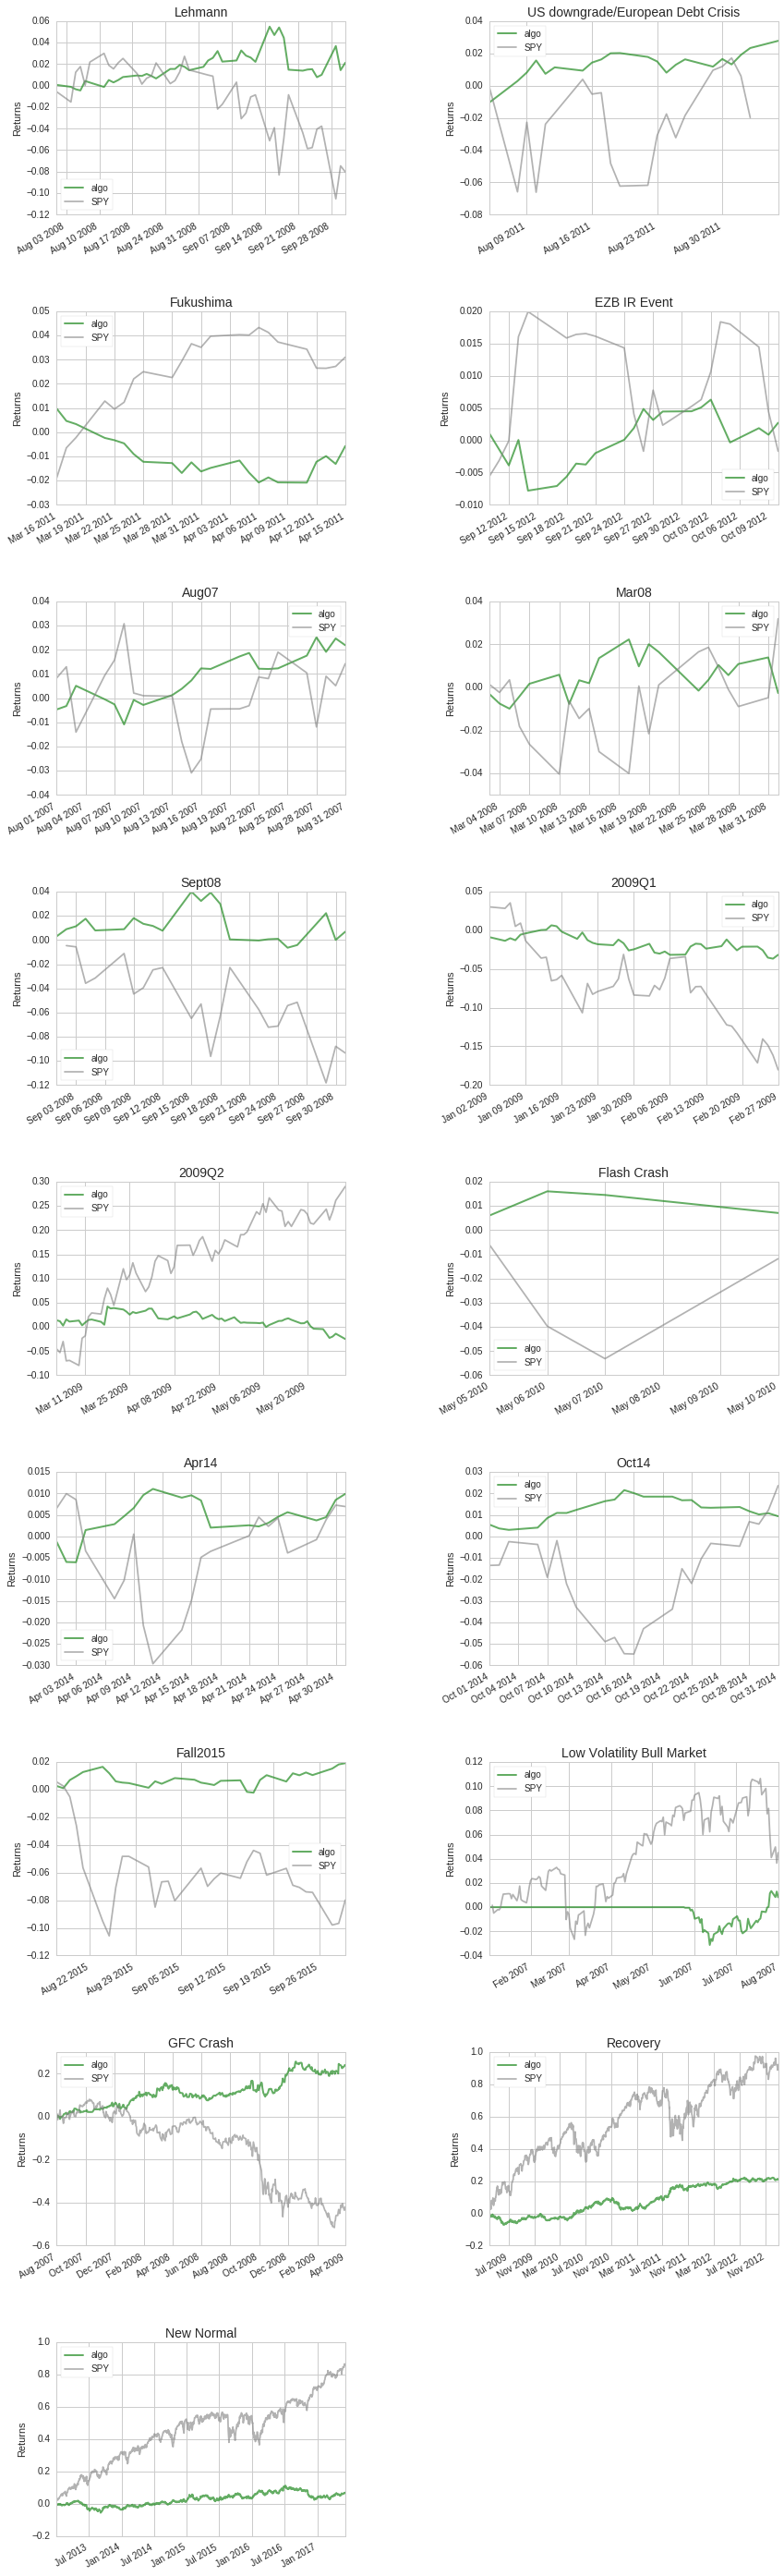

Top 10 long positions of all time   max
TYZ07-1020200712                  0.11%
TYM10-1020201006                  0.10%
TYH16-1020201603                  0.10%
TYM16-1020201606                  0.10%
TYU10-1020201009                  0.10%
TYM08-1020200806                  0.10%
TYU16-1020201609                  0.10%
TYM13-1020201306                  0.10%
TYU13-1020201309                  0.10%
TYZ16-1020201612                  0.10%

Top 10 short positions of all time    max
TUU09-1019200909                   -0.06%
TUH10-1019201003                   -0.05%
TUH09-1019200903                   -0.05%
TUZ09-1019200912                   -0.05%
TUM12-1019201206                   -0.05%
TUU13-1019201309                   -0.05%
TUM10-1019201006                   -0.05%
TUH13-1019201303                   -0.05%
TUH11-1019201103                   -0.05%
TUM13-1019201306                   -0.05%

Top 10 positions of all time   max
TYZ07-1020200712             0.11%
TYM10-1020201006             0.10%
TYH16-1020201603             0.10%
TYM16-1020201606             0.10%
TYU10-1020201009             0.10%
TYM08-1020200806             0.10%
TYU16-1020201609             0.10%
TYM13-1020201306             0.10%
TYU13-1020201309             0.10%
TYZ16-1020201612             0.10%

All positions ever held   max
TYZ07-1020200712        0.11%
TYM10-1020201006        0.10%
TYH16-1020201603        0.10%
TYM16-1020201606        0.10%
TYU10-1020201009        0.10%
TYM08-1020200806        0.10%
TYU16-1020201609        0.10%
TYM13-1020201306        0.10%
TYU13-1020201309        0.10%
TYZ16-1020201612        0.10%
TYZ10-1020201012        0.10%
TYH17-1020201703        0.10%
TYZ13-1020201312        0.10%
TYH11-1020201103        0.10%
TYM17-1020201706        0.10%
TYZ08-1020200812        0.10%
TYU17-1020201709        0.10%
TYH09-1020200903        0.10%
TYH14-1020201403        0.10%
TYM11-1020201106        0.10%
TYM14-1020201406        0.10%
TYM09-1020200906        0.10%
TYZ14-1020201412        0.10%
TYU11-1020201109        0.10%
TYU14-1020201409        0.10%
TYH15-1020201503        0.10%
TYU09-1020200909        0.10%
TYZ11-1020201112        0.10%
TYM12-1020201206        0.10%
TYM15-1020201506        0.10%
...                       ...
TUU13-1019201309        0.05%
TUH12-1019201203        0.05%
TUH14-1019201403        0.05%
TUU07-1019200709        0.05%
TUM14-1019201406        0.05%
TUU10-1019201009        0.05%
TUU12-1019201209        0.05%
TUH13-1019201303        0.05%
TUH11-1019201103        0.05%
TUM13-1019201306        0.05%
TUZ12-1019201212        0.05%
TUU14-1019201409        0.05%
TUM11-1019201106        0.05%
TUZ14-1019201412        0.05%
TUZ07-1019200712        0.05%
TUH08-1019200803        0.05%
TUH15-1019201503        0.05%
TUZ10-1019201012        0.05%
TUU15-1019201509        0.05%
TUM15-1019201506        0.05%
TUZ15-1019201512        0.05%
TUH17-1019201703        0.05%
TUU11-1019201109        0.05%
TUH16-1019201603        0.05%
TUM17-1019201706        0.05%
TUZ08-1019200812        0.05%
TUM08-1019200806        0.05%
TUM16-1019201606        0.05%
TUU16-1019201609        0.05%
TUU17-1019201709        0.05%

[81 rows x 1 columns]

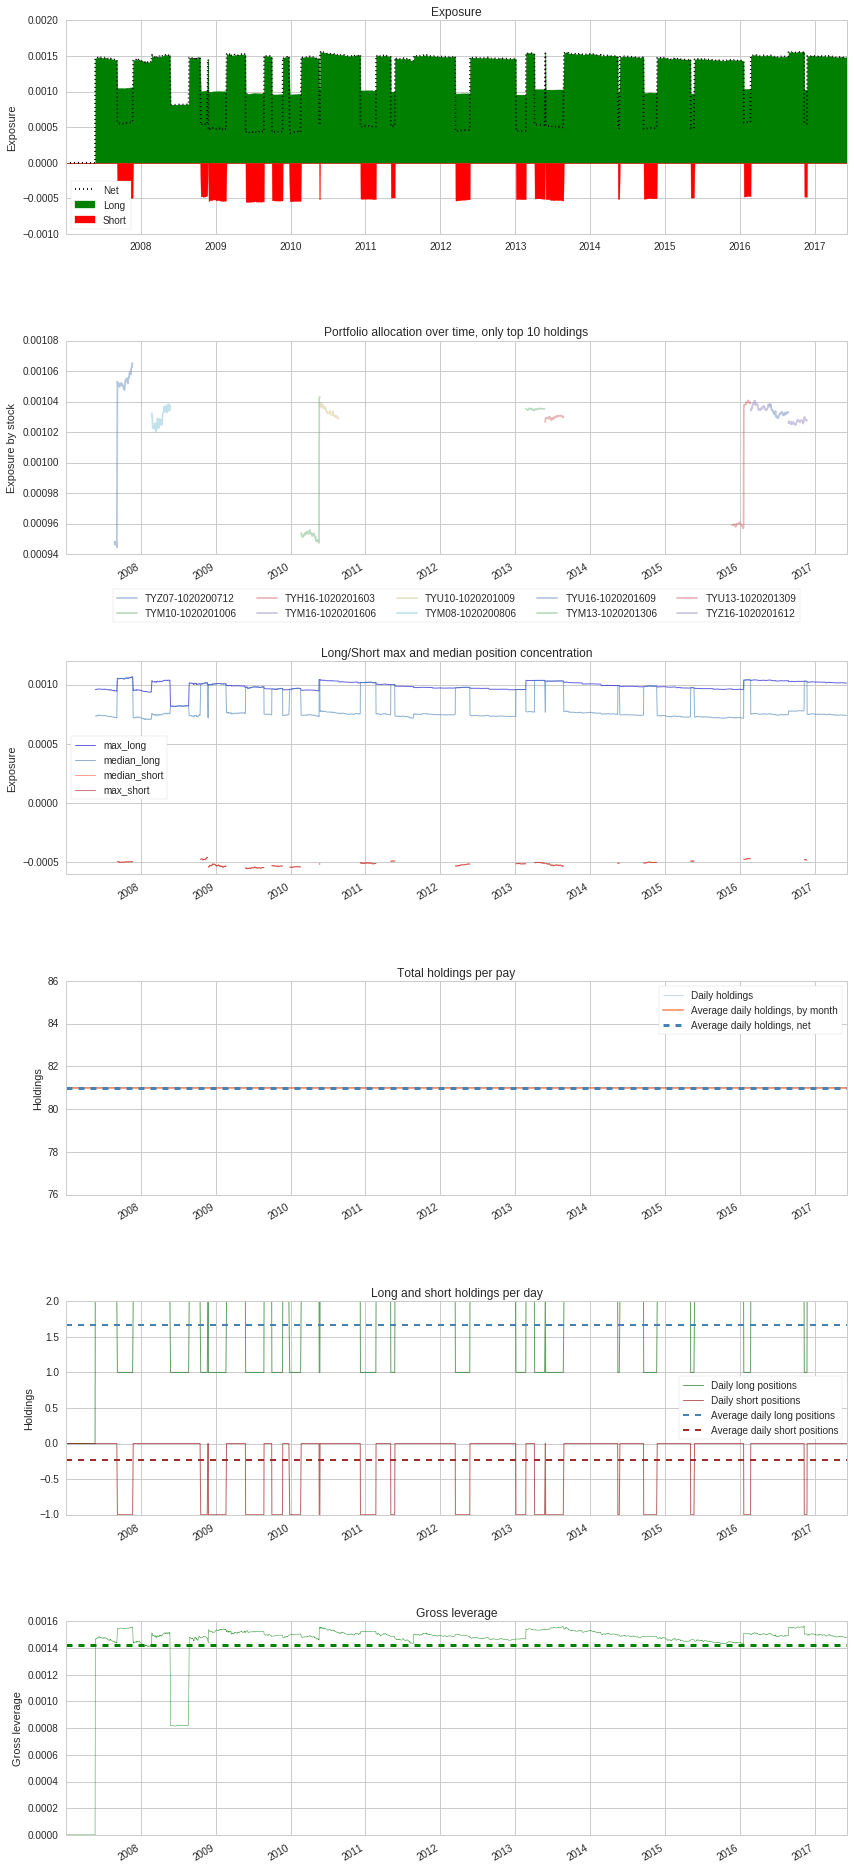

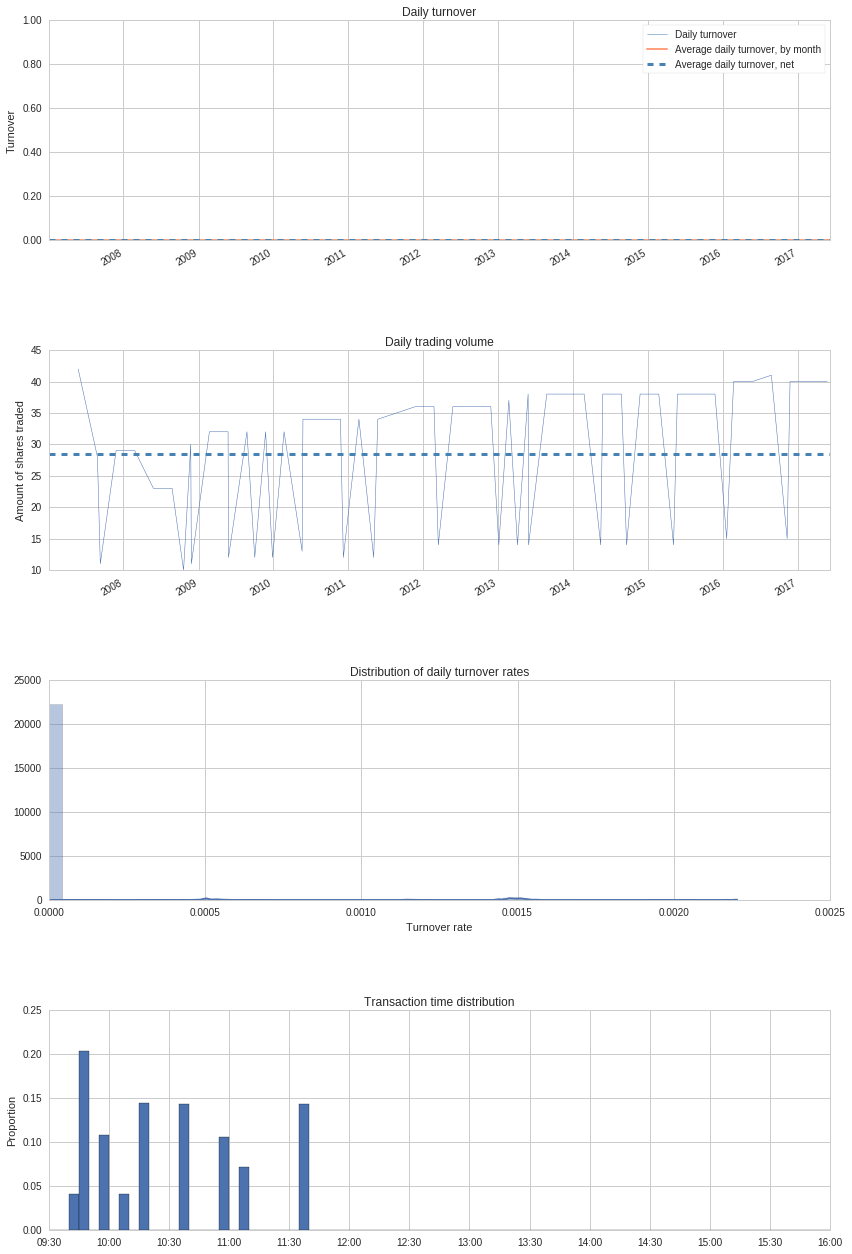

In [39]:
# RSI 30/70
# negligible leverage
tut_rsi14_bt.create_full_tear_sheet(live_start_date='2014-1-1')

In [40]:
tut_rsi5_bt = get_backtest('5939d820d6b1024d4bff9dff')

100% Time: 0:00:01|###########################################################|


Entire data start date: 2007-01-02
Entire data end date: 2017-06-07


Out-of-Sample Months: 42
Backtest Months: 86


Performance statistics   All history  Backtest  Out of sample
annual_return                   0.05      0.06           0.03
cum_returns_final               0.73      0.56           0.11
annual_volatility               0.07      0.08           0.05
sharpe_ratio                    0.76      0.83           0.59
calmar_ratio                    0.54      0.66           0.39
stability_of_timeseries         0.86      0.93           0.62
max_drawdown                   -0.10     -0.10          -0.07
omega_ratio                     1.14      1.16           1.10
sortino_ratio                   1.13      1.24           0.86
skew                            0.28      0.27           0.10
kurtosis                        5.27      4.73           1.22
tail_ratio                      1.08      1.01           0.99
common_sense_ratio              1.13      1.08           1.02
gross_leverage                  0.00      0.00           0.00
information_ratio              -0.01     -0.00          -0.03
alpha                           0.07      0.08           0.05
beta                           -0.16     -0.16          -0.14

Worst drawdown periods net drawdown in %  peak date valley date recovery date  \
0                                   9.75 2008-12-18  2009-06-08    2009-11-26   
1                                   7.71 2010-11-04  2011-02-08    2011-06-08   
2                                   7.49 2016-07-05  2016-12-15           NaT   
3                                   7.37 2013-05-02  2013-09-05    2014-10-15   
4                                   6.91 2008-03-17  2008-06-16    2008-09-15   

Worst drawdown periods duration  
0                           246  
1                           155  
2                           NaN  
3                           380  
4                           131



[-0.009 -0.017]


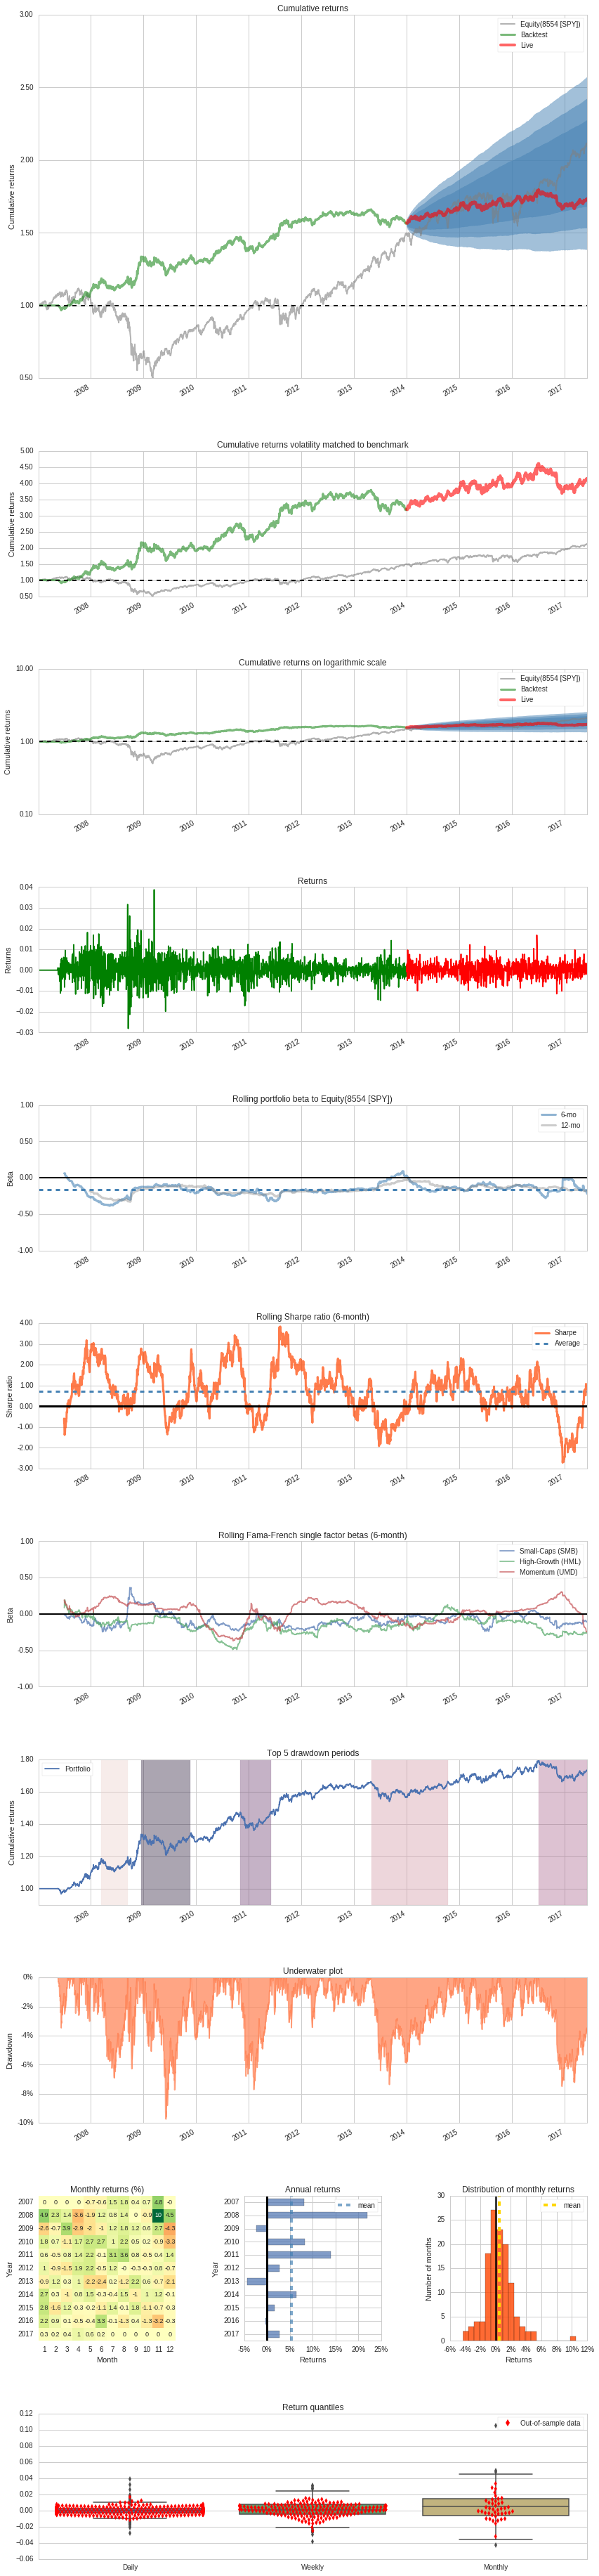

Stress Events                       mean    min   max
Lehmann                            0.05% -2.81% 3.16%
US downgrade/European Debt Crisis  0.13% -1.06% 1.36%
Fukushima                         -0.02% -0.39% 0.72%
EZB IR Event                       0.01% -0.74% 0.36%
Aug07                              0.08% -0.60% 0.76%
Mar08                             -0.01% -1.75% 1.15%
Sept08                             0.04% -2.81% 3.16%
2009Q1                            -0.08% -1.31% 1.50%
2009Q2                            -0.03% -1.31% 3.87%
Flash Crash                        0.18% -0.75% 1.00%
Apr14                              0.05% -0.63% 0.76%
Oct14                              0.04% -0.34% 0.56%
Fall2015                           0.06% -0.84% 0.95%
Low Volatility Bull Market         0.00% -1.11% 0.96%
GFC Crash                          0.07% -2.81% 3.87%
Recovery                           0.02% -1.99% 1.36%
New Normal                         0.01% -1.45% 1.69%

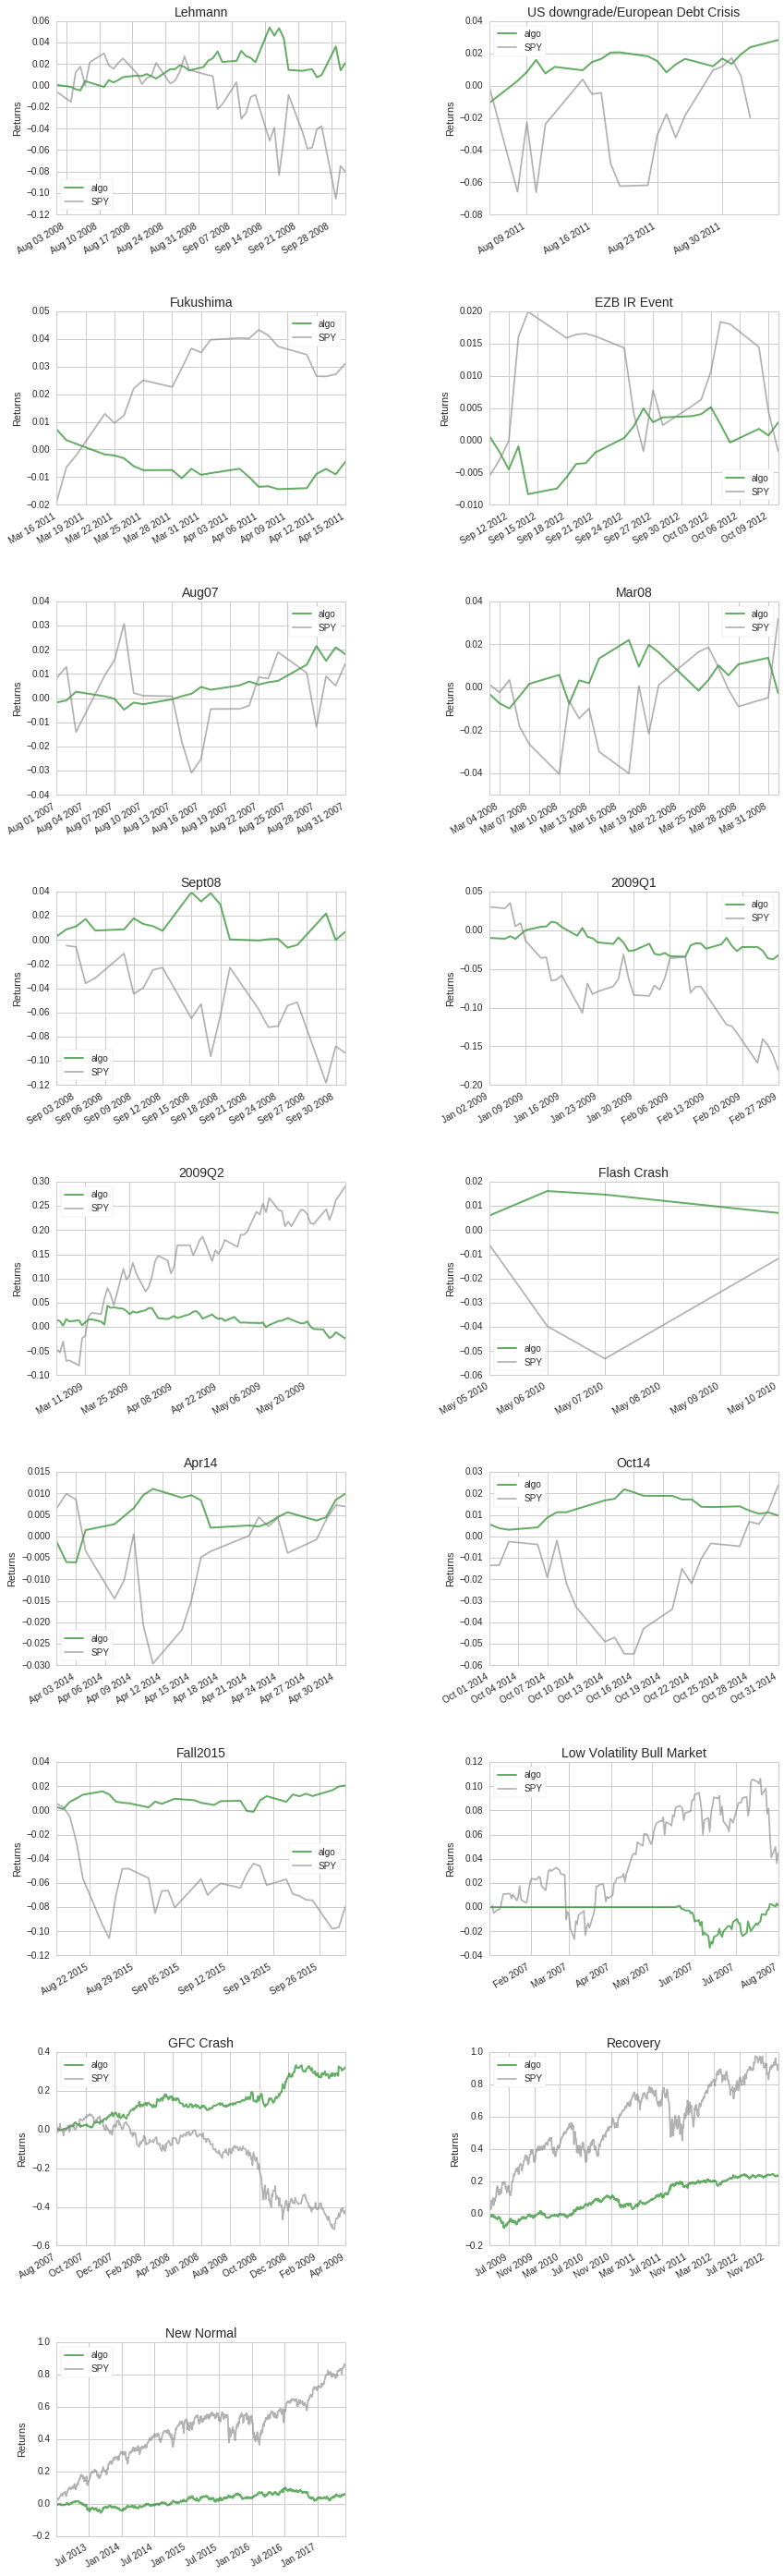

Top 10 long positions of all time   max
TYH08-1020200803                  0.11%
TYZ10-1020201012                  0.10%
TYU13-1020201309                  0.10%
TYH11-1020201103                  0.10%
TYM09-1020200906                  0.10%
TYH17-1020201703                  0.10%
TYZ13-1020201312                  0.10%
TYU09-1020200909                  0.10%
TYM17-1020201706                  0.10%
TYM08-1020200806                  0.10%

Top 10 short positions of all time    max
TUM11-1019201106                   -0.05%
TUZ14-1019201412                   -0.05%
TUZ10-1019201012                   -0.05%
TUH15-1019201503                   -0.05%
TUZ15-1019201512                   -0.05%
TUH16-1019201603                   -0.05%
TUH17-1019201703                   -0.05%
TUZ16-1019201612                   -0.05%
TUU07-1019200709                   -0.05%
TUU15-1019201509                   -0.05%

Top 10 positions of all time   max
TYH08-1020200803             0.11%
TYZ10-1020201012             0.10%
TYU13-1020201309             0.10%
TYH11-1020201103             0.10%
TYM09-1020200906             0.10%
TYH17-1020201703             0.10%
TYZ13-1020201312             0.10%
TYU09-1020200909             0.10%
TYM17-1020201706             0.10%
TYM08-1020200806             0.10%

All positions ever held   max
TYH08-1020200803        0.11%
TYZ10-1020201012        0.10%
TYU13-1020201309        0.10%
TYH11-1020201103        0.10%
TYM09-1020200906        0.10%
TYH17-1020201703        0.10%
TYZ13-1020201312        0.10%
TYU09-1020200909        0.10%
TYM17-1020201706        0.10%
TYM08-1020200806        0.10%
TYU17-1020201709        0.10%
TYM11-1020201106        0.10%
TYH14-1020201403        0.10%
TYU11-1020201109        0.10%
TYM14-1020201406        0.10%
TYZ09-1020200912        0.10%
TYZ14-1020201412        0.10%
TYZ08-1020200812        0.10%
TYU14-1020201409        0.10%
TYH15-1020201503        0.10%
TYZ11-1020201112        0.10%
TYH10-1020201003        0.10%
TYM12-1020201206        0.10%
TYH12-1020201203        0.10%
TYM15-1020201506        0.10%
TYU12-1020201209        0.10%
TYM10-1020201006        0.10%
TYU15-1020201509        0.10%
TYH16-1020201603        0.10%
TYZ12-1020201212        0.10%
...                       ...
TUH17-1019201703        0.05%
TUZ15-1019201512        0.05%
TUM17-1019201706        0.05%
TUH16-1019201603        0.05%
TUM09-1019200906        0.05%
TUZ16-1019201612        0.05%
TUM07-1019200706        0.05%
TUM16-1019201606        0.05%
TUZ07-1019200712        0.05%
TUZ09-1019200912        0.05%
TUU16-1019201609        0.05%
TUH10-1019201003        0.05%
TUM10-1019201006        0.05%
TUU17-1019201709        0.05%
TUZ11-1019201112        0.05%
TUZ13-1019201312        0.05%
TUM12-1019201206        0.05%
TUU13-1019201309        0.05%
TUH08-1019200803        0.05%
TUH12-1019201203        0.05%
TUH14-1019201403        0.05%
TUM14-1019201406        0.05%
TUU10-1019201009        0.05%
TUU12-1019201209        0.05%
TUH13-1019201303        0.05%
TUZ12-1019201212        0.05%
TUU14-1019201409        0.05%
TUZ08-1019200812        0.05%
TUM13-1019201306        0.05%
TUM08-1019200806        0.05%

[83 rows x 1 columns]

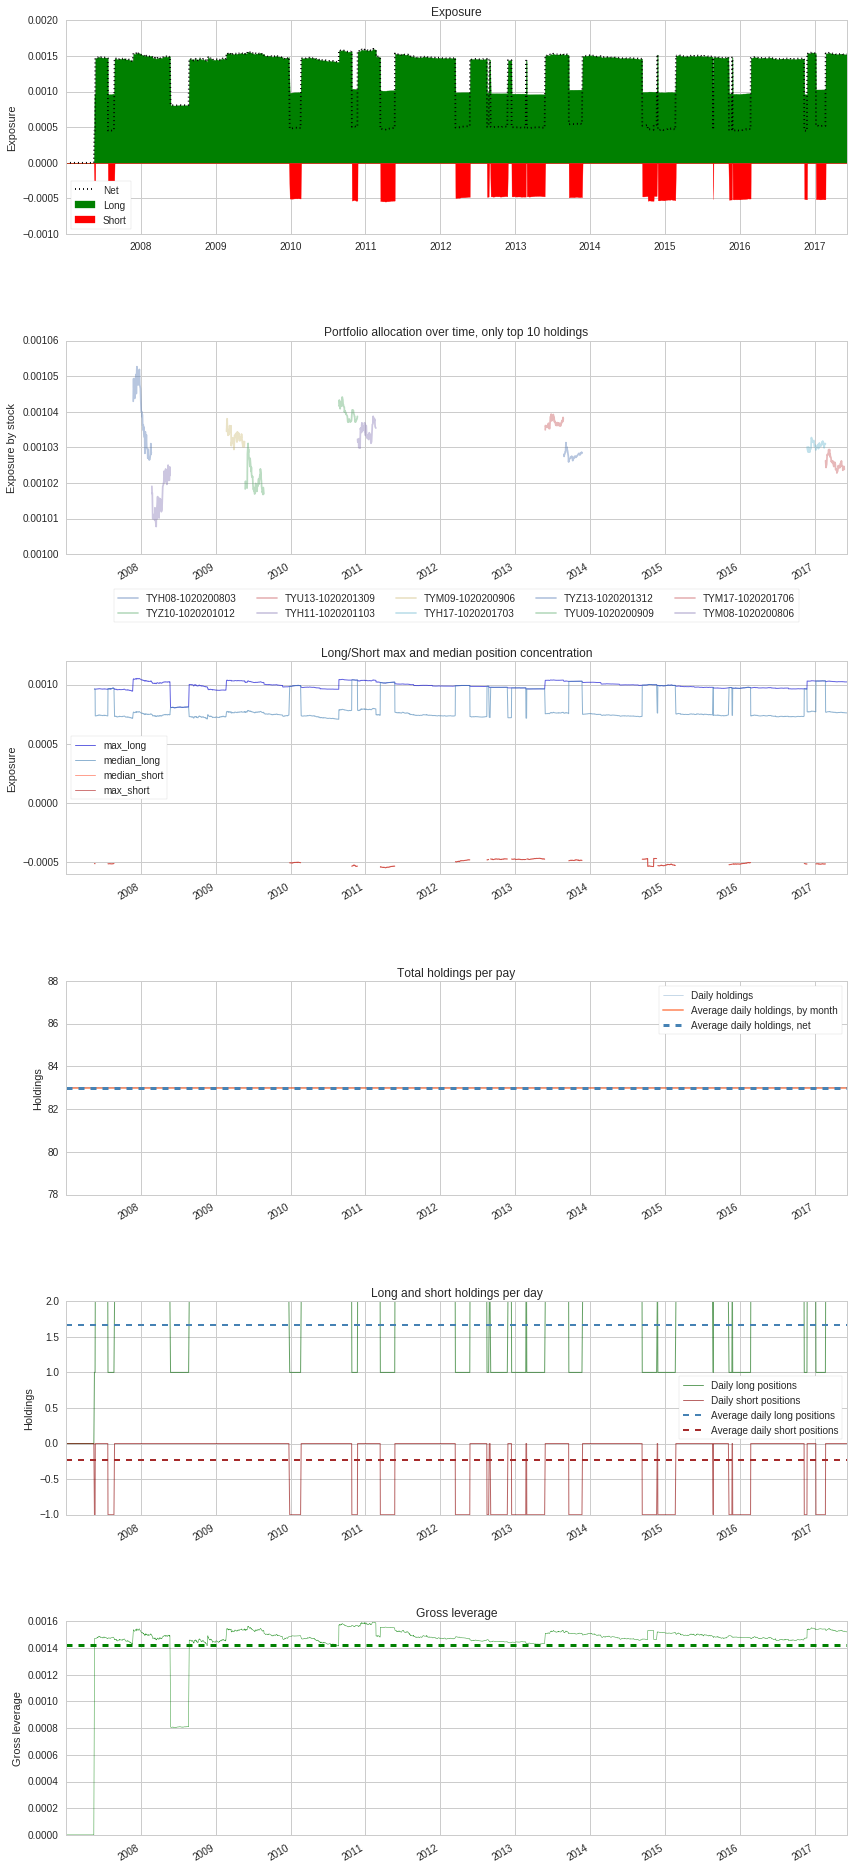

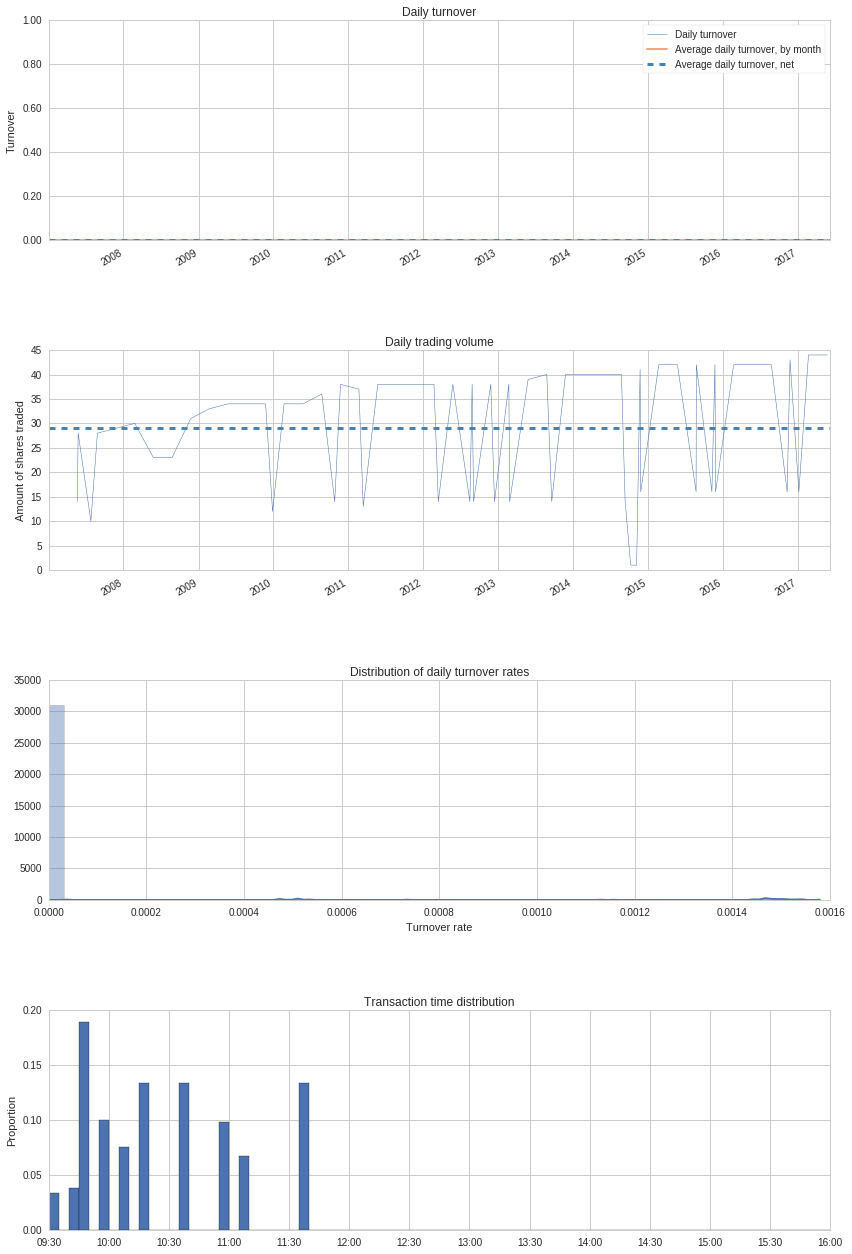

In [41]:
# RSI 18/85
# negligible leverage
tut_rsi5_bt.create_full_tear_sheet(live_start_date='2014-1-1')

Let's compare the NOB, FITE and TUT performance over time

100% Time: 0:00:01|###########################################################|
100% Time: 0:00:01|###########################################################|
100% Time: 0:00:01|###########################################################|


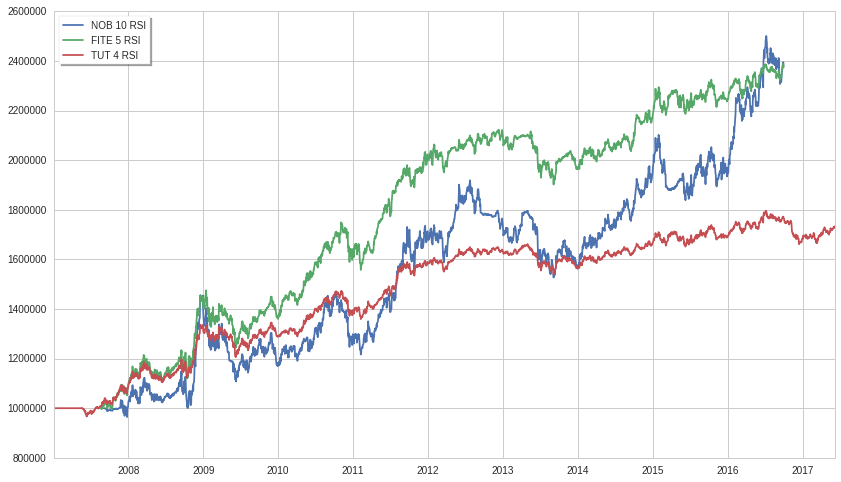

In [42]:
nob10_bt = get_backtest('5939e5c9f4c4366a0bf43345')
fite5_bt = get_backtest('5939dcbfd6b1024d4bff9e35')
tut5_bt = get_backtest('5939d820d6b1024d4bff9dff')

plt.plot(nob10_bt.daily_performance.ending_portfolio_value,label = 'NOB 10 RSI')
plt.plot(fite5_bt.daily_performance.ending_portfolio_value,label='FITE 5 RSI')
plt.plot(tut5_bt.daily_performance.ending_portfolio_value,label='TUT 4 RSI')
plt.legend(loc = 2,fontsize= 10,shadow=True);